#### This notebook describes:

#### 1) How the cell-cellcommunication analysis for the three pathological Niches was performed using CellChat

#### 2) How all the plots related to cell-communication were generated

# Cell-cell and cell-ligant analysis

This notebook is based on CellChat vignette:
https://github.com/sqjin/CellChat <br/>

## load environment

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [ ]:
import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [1]:
# R 4.1.0 : Biocondutor 3.13 : Python 3.9.5

In [3]:
# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [5]:
%%R
options(bitmapType='cairo')

## load R libraries

In [105]:
%%R
packageVersion("CellChat")

[1] ‘1.1.2’


In [109]:
%%R
packageVersion("CellChat")

[1] ‘1.1.2’


if CellChat not installed then: `devtools::install_github("sqjin/CellChat")`

In [110]:
%%R
library(CellChat)
library(patchwork)
library(scater)
library(tidyverse)
library(cowplot)
library(Matrix.utils)
library(dplyr)
library(magrittr)
library(Matrix)
library(purrr)
library(reshape2)
library(S4Vectors)
library(tibble)
library(RColorBrewer)
library(openxlsx)
options(stringsAsFactors = FALSE)
library(NMF)
library(ggalluvial)

### Infer the cell-cell communication at a signaling pathway level

The communication probability is computed on signaling pathway level by summarizing the communication probabilities of all ligands-receptors interactions associated with each signaling pathway.

**Please note** \
The inferred intercellular communication network of each ligand-receptor pair and each signaling pathway is stored in the slot ‘net’ and ‘netP’, respectively.

In [7]:
%%R
## load !
IPF <- readRDS("CellChat_IPF.rds")
Control <- readRDS("CellChat_control.rds")

# simulate Spatial Niches

# Immune Niche

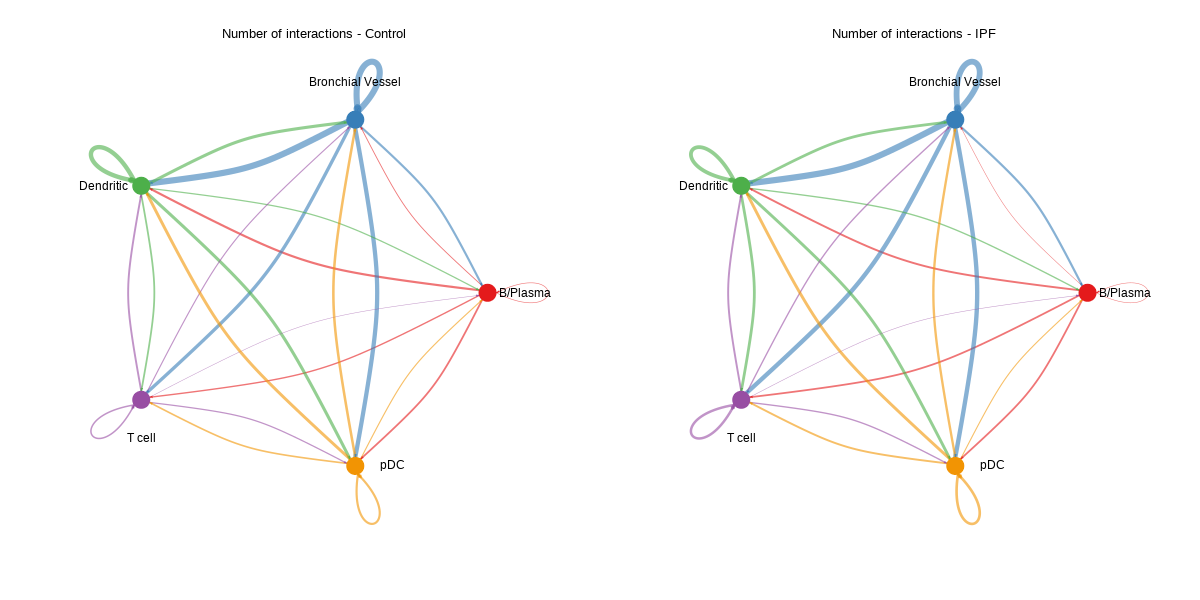

In [10]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= F, 
    title.name = "Number of interactions - Control",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= FALSE, 
    title.name = "Number of interactions - IPF",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)


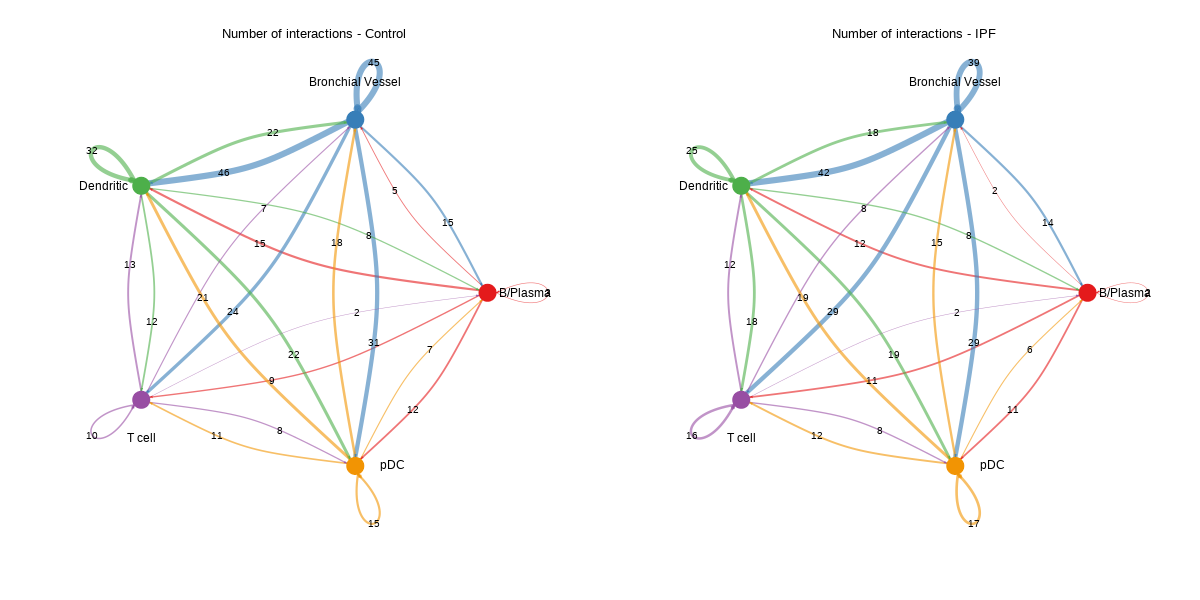

In [192]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - Control",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - IPF",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)


In [193]:
%%R -w 1200 -h 600
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_Circle_numbered.pdf")
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - Control",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - IPF",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)
dev.off()

[1] 2


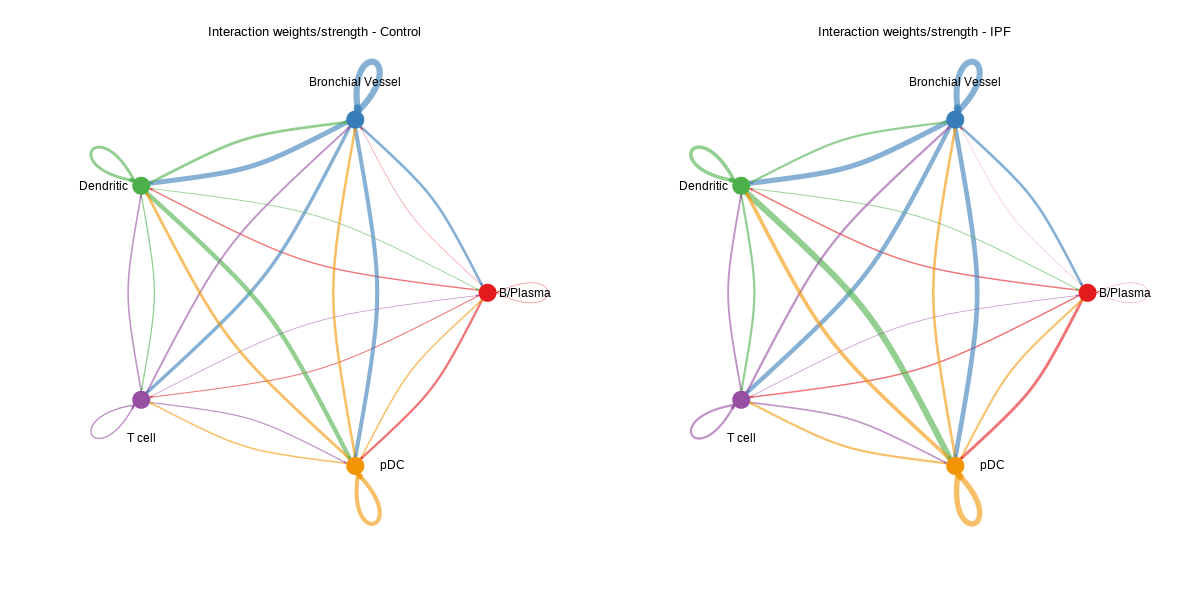

In [11]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$weight, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= F, 
    title.name = "Interaction weights/strength - Control",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$weight, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= FALSE, 
    title.name = "Interaction weights/strength - IPF",
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    remove.isolate=T
)


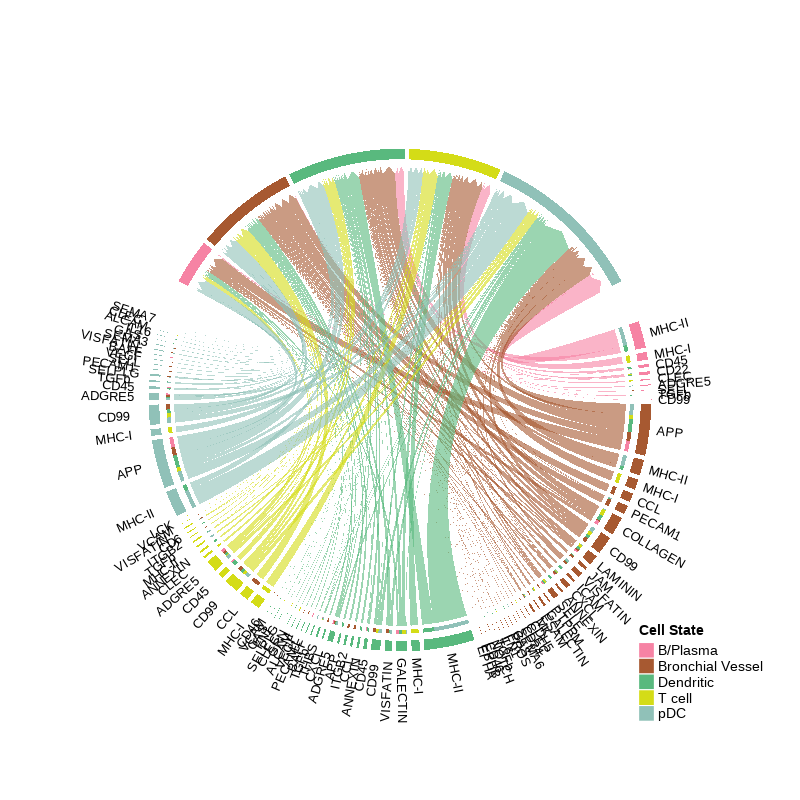

In [12]:
%%R -w 800 -h 800 -r 100
# show all the significant signaling pathways from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
netVisual_chord_gene(IPF,
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    slot.name = "netP", legend.pos.x = 10,
    thresh = 0.01)

In [10]:
%%R
immune_net <- subsetCommunication(IPF,         sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"))

In [48]:
%%R
## 3700 interactions is a lot...
str(immune_net)

'data.frame':	394 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 8 11 16 33 36 8 11 16 33 36 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 16 16 16 16 16 36 36 36 36 36 ...
 $ ligand            : chr  "TGFB1" "TGFB1" "TGFB1" "TGFB1" ...
 $ receptor          : chr  "TGFbR1_R2" "TGFbR1_R2" "TGFbR1_R2" "TGFbR1_R2" ...
 $ prob              : num  0.001792 0.000868 0.004223 0.005796 0.006132 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ interaction_name_2: chr  "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" ...
 $ pathway_name      : chr  "TGFb" "TGFb" "TGFb" "TGFb" ...
 $ annotation        : chr  "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" ...
 $ evidence          : chr  "KEGG: hsa04350" "KEGG: hsa04350" "KEGG: hsa04350" "KEG

In [11]:
%%R
sorted_immune_net <- immune_net %>%
  arrange(prob)

In [12]:
%%R
head(sorted_immune_net)

            source           target   ligand  receptor         prob pval
1 Bronchial Vessel Bronchial Vessel     F11R      F11R 0.0004168867    0
2 Bronchial Vessel Bronchial Vessel    EFNB2     EPHA4 0.0005635126    0
3 Bronchial Vessel Bronchial Vessel    EFNA1     EPHA4 0.0005969796    0
4        Dendritic           T cell    HLA-F      CD8B 0.0007303094    0
5 Bronchial Vessel        Dendritic    TGFB1 TGFbR1_R2 0.0008679247    0
6              pDC         B/Plasma TNFSF13B TNFRSF13B 0.0009327079    0
     interaction_name      interaction_name_2 pathway_name         annotation
1           F11R_F11R             F11R - F11R          JAM  Cell-Cell Contact
2         EFNB2_EPHA4           EFNB2 - EPHA4         EPHB  Cell-Cell Contact
3         EFNA1_EPHA4           EFNA1 - EPHA4         EPHA  Cell-Cell Contact
4          HLA-F_CD8B            HLA-F - CD8B        MHC-I  Cell-Cell Contact
5 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2)         TGFb Secreted Signaling
6  TNFSF13B_TNFRSF13B

In [13]:
%%R
## filter for only signifcant interactions
sorted_immune_net <- filter(sorted_immune_net, pval<0.01)

In [14]:
%%R
str(sorted_immune_net)

'data.frame':	386 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 11 11 16 11 36 11 16 11 11 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 11 11 33 16 8 36 11 36 36 ...
 $ ligand            : chr  "F11R" "EFNB2" "EFNA1" "HLA-F" ...
 $ receptor          : chr  "F11R" "EPHA4" "EPHA4" "CD8B" ...
 $ prob              : num  0.000417 0.000564 0.000597 0.00073 0.000868 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1645 1613 1582 1669 1 789 1381 1533 1368 1379 ...
 $ interaction_name_2: chr  "F11R - F11R" "EFNB2 - EPHA4" "EFNA1 - EPHA4" "HLA-F - CD8B" ...
 $ pathway_name      : chr  "JAM" "EPHB" "EPHA" "MHC-I" ...
 $ annotation        : chr  "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" ...
 $ evidence          : chr  "KEGG: hsa04514" "PMID: 15114347" "PMID: 15114347" "KEGG: hsa04514" ...


In [ ]:
%%R
write.csv(sorted_spp1_net, "IPF_ImmuneNiche_CellChat.csv")

In [15]:
%%R
unique(sorted_immune_net$pathway_name)

 [1] "JAM"      "EPHB"     "EPHA"     "MHC-I"    "TGFb"     "BAFF"    
 [7] "LAMININ"  "CD46"     "COLLAGEN" "NOTCH"    "SELPLG"   "SEMA3"   
[13] "FN1"      "SEMA6"    "SEMA7"    "VEGF"     "MK"       "IL16"    
[19] "MHC-II"   "CLEC"     "SELL"     "CD99"     "VCAM"     "GAS"     
[25] "SELE"     "LCK"      "ICAM"     "IL6"      "VISFATIN" "ITGB2"   
[31] "THBS"     "ALCAM"    "CD6"      "GALECTIN" "PROS"     "CD34"    
[37] "CXCL"     "CD22"     "CD45"     "GRN"      "PECAM1"   "CDH5"    
[43] "ADGRE5"   "ESAM"     "PTPRM"    "ANNEXIN"  "APP"      "CCL"     


In [203]:
%%R
## count number of interactions per category... maybe a way to split plots?
(counts_annotation <- setNames(data.frame(table(sorted_immune_net$annotation)), c("annotation", "LR_pairs")))

          annotation LR_pairs
1  Cell-Cell Contact      249
2       ECM-Receptor       56
3 Secreted Signaling       81


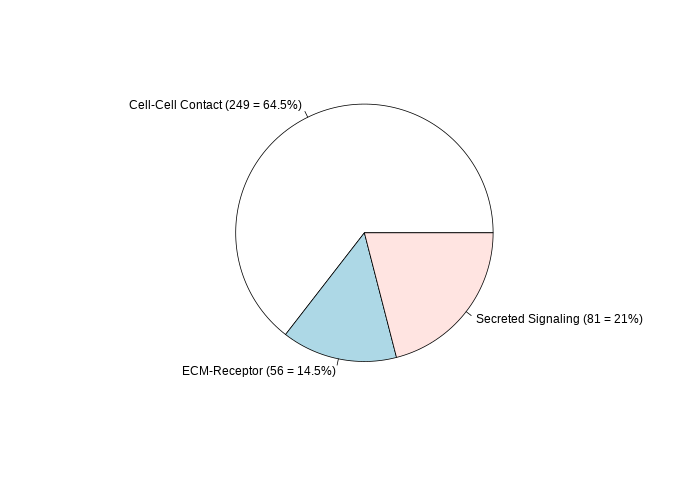

In [21]:
%%R -w 700
pie_labels <- paste0(counts_annotation$LR_pairs," = ", round(100 * counts_annotation$LR_pairs/sum(counts_annotation$LR_pairs), 1), "%")
pie(counts_annotation$LR_pairs, labels = paste0(counts_annotation$annotation," (", pie_labels,")"))

In [22]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_annotation_pie.pdf")
pie_labels <- paste0(counts_annotation$LR_pairs," = ", round(100 * counts_annotation$LR_pairs/sum(counts_annotation$LR_pairs), 1), "%")
pie(counts_annotation$LR_pairs, labels = paste0(counts_annotation$annotation," (", pie_labels,")"))
dev.off()

[1] 2


#### cell cell contact

In [16]:
%%R
## filter for only signifcant interactions
immune_net_ccc <- filter(sorted_immune_net, annotation == "Cell-Cell Contact")
str(immune_net_ccc)

'data.frame':	249 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 11 11 16 16 11 11 16 16 11 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 11 11 33 11 33 16 11 8 11 ...
 $ ligand            : chr  "F11R" "EFNB2" "EFNA1" "HLA-F" ...
 $ receptor          : chr  "F11R" "EPHA4" "EPHA4" "CD8B" ...
 $ prob              : num  0.000417 0.000564 0.000597 0.00073 0.001068 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1645 1613 1582 1669 1533 1669 1733 1764 1763 1786 ...
 $ interaction_name_2: chr  "F11R - F11R" "EFNB2 - EPHA4" "EFNA1 - EPHA4" "HLA-F - CD8B" ...
 $ pathway_name      : chr  "JAM" "EPHB" "EPHA" "MHC-I" ...
 $ annotation        : chr  "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" ...
 $ evidence          : chr  "KEGG: hsa04514" "PMID: 15114347" "PMID: 15114347" "KEGG: hsa04514" ...


In [24]:
%%R
write.csv(immune_net_ccc, "IPF_ImmuneNiche_CCC.csv")

In [206]:
%%R
## a lot of different pathways... but some with only one LR_Pair! Filter here for pathways with at least ... 3? pairs?
(counts_pathway_ccc <- setNames(data.frame(table(immune_net_ccc$pathway_name)), c("annotation", "LR_pairs")))

   annotation LR_pairs
1      ADGRE5       14
2       ALCAM        2
3         APP       11
4        CD22        4
5        CD34        1
6        CD45        8
7        CD46        2
8         CD6        2
9        CD99       20
10       CDH5        1
11       CLEC        9
12       EPHA        1
13       EPHB        2
14       ESAM        1
15       ICAM        5
16      ITGB2        4
17        JAM        6
18        LCK        1
19      MHC-I       46
20     MHC-II       74
21      NOTCH        3
22     PECAM1        5
23      PTPRM        1
24       SELE        9
25       SELL        4
26     SELPLG        8
27      SEMA6        2
28      SEMA7        1
29       VCAM        2


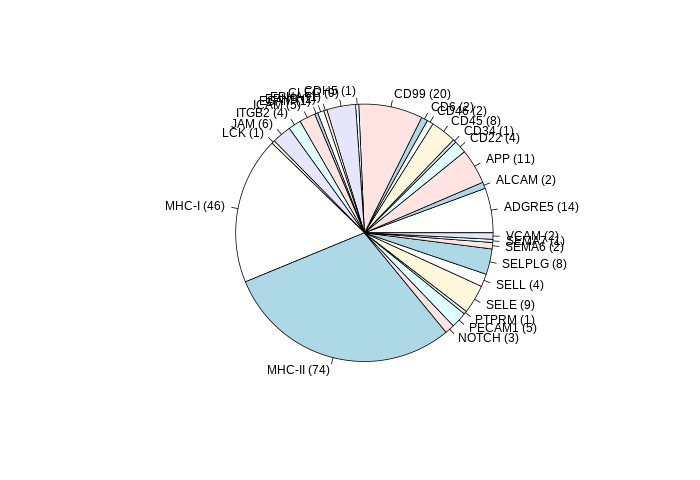

In [209]:
%%R -w 700
#pdf(file = "./figures/CellChat_IPF_ImmuneNiche_CCC_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ccc$LR_pairs," = ", round(100 * counts_pathway_ccc$LR_pairs/sum(counts_pathway_ccc$LR_pairs), 2), "%",")")
pie(counts_pathway_ccc$LR_pairs, labels = paste0(counts_pathway_ccc$annotation," (",counts_pathway_ccc$LR_pairs,")"))
#dev.off()

In [208]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_CCC_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ccc$LR_pairs," = ", round(100 * counts_pathway_ccc$LR_pairs/sum(counts_pathway_ccc$LR_pairs), 2), "%",")")
pie(counts_pathway_ccc$LR_pairs, labels = paste0(counts_pathway_ccc$annotation," (",counts_pathway_ccc$LR_pairs,")"))
dev.off()

[1] 2


In [75]:
%%R
immune_net_ccc_pairs <- data.frame(interaction_name = immune_net_ccc$interaction_name,interaction_name_2 = immune_net_ccc$interaction_name_2)
immune_net_ccc_pairs

     interaction_name    interaction_name_2
1           F11R_F11R           F11R - F11R
2         EFNB2_EPHA4         EFNB2 - EPHA4
3         EFNA1_EPHA4         EFNA1 - EPHA4
4          HLA-F_CD8B          HLA-F - CD8B
5           CD46_JAG1           CD46 - JAG1
6          HLA-F_CD8B          HLA-F - CD8B
7         JAG1_NOTCH2         JAG1 - NOTCH2
8         SELPLG_SELP         SELPLG - SELP
9         SELPLG_SELL         SELPLG - SELL
10      SEMA6A_PLXNA2       SEMA6A - PLXNA2
11        JAG1_NOTCH4         JAG1 - NOTCH4
12      SEMA7A_PLXNC1       SEMA7A - PLXNC1
13         HLA-F_CD8B          HLA-F - CD8B
14        EFNB2_EPHB1         EFNB2 - EPHB1
15          CD46_JAG1           CD46 - JAG1
16        SELPLG_SELL         SELPLG - SELL
17        HLA-DOA_CD4         HLA-DOA - CD4
18        JAG1_NOTCH4         JAG1 - NOTCH4
19       HLA-DQA2_CD4        HLA-DQA2 - CD4
20         HLA-F_CD8A          HLA-F - CD8A
21       CLEC2B_KLRB1        CLEC2B - KLRB1
22       HLA-DQA1_CD4        HLA

R[write to console]: Comparing communications on a single object 




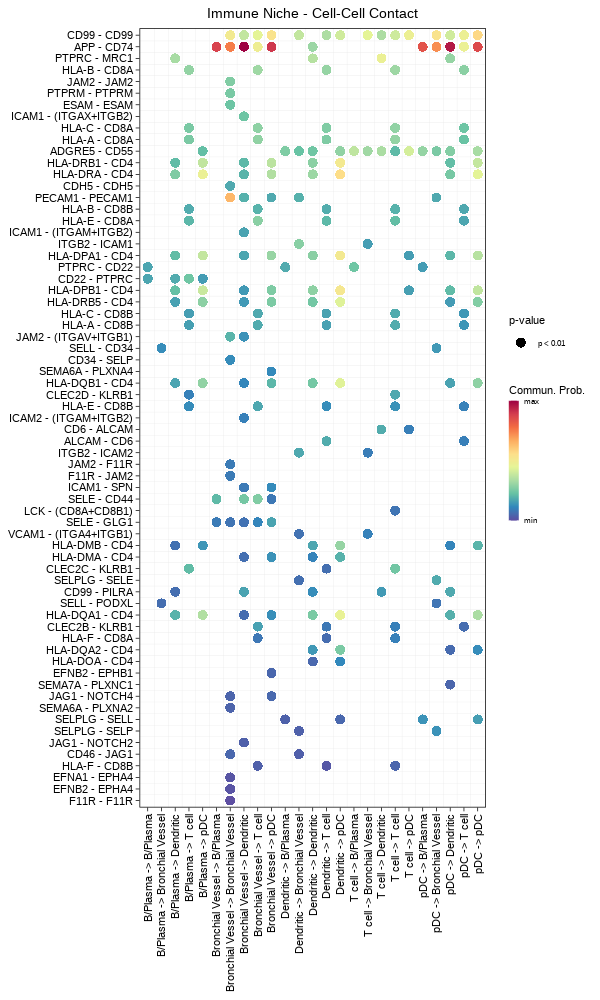

In [48]:
%%R -h 1000 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = immune_net_ccc_pairs,
    remove.isolate = FALSE,
    thresh=0.01,
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    title.name = "Immune Niche - Cell-Cell Contact" )

In [49]:
%%R
options(stringsAsFactors = FALSE)

In [46]:
%%R -h 950 -w 550 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = immune_net_ccc_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    title.name = "Immune Niche - Cell-Cell Contact" )
ggsave(filename="./figures/CellChat_IPF_ImmuneNiche_CCC_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 5.5 x 9.5 in image


In [54]:
%%R
str(immune_net_ccc)

'data.frame':	249 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 11 11 16 16 11 11 16 16 11 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 11 11 33 11 33 16 11 8 11 ...
 $ ligand            : chr  "F11R" "EFNB2" "EFNA1" "HLA-F" ...
 $ receptor          : chr  "F11R" "EPHA4" "EPHA4" "CD8B" ...
 $ prob              : num  0.000417 0.000564 0.000597 0.00073 0.001068 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1645 1613 1582 1669 1533 1669 1733 1764 1763 1786 ...
 $ interaction_name_2: chr  "F11R - F11R" "EFNB2 - EPHA4" "EFNA1 - EPHA4" "HLA-F - CD8B" ...
 $ pathway_name      : chr  "JAM" "EPHB" "EPHA" "MHC-I" ...
 $ annotation        : chr  "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" ...
 $ evidence          : chr  "KEGG: hsa04514" "PMID: 15114347" "PMID: 15114347" "KEGG: hsa04514" ...


#### Secreted Signaling

In [17]:
%%R
## filter for only signifcant interactions
immune_net_ssg <- filter(sorted_immune_net, annotation == "Secreted Signaling")
str(immune_net_ssg)

'data.frame':	81 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 36 36 36 16 11 11 36 16 8 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 16 8 11 11 11 16 16 16 8 16 ...
 $ ligand            : chr  "TGFB1" "TNFSF13B" "SEMA3C" "SEMA3C" ...
 $ receptor          : chr  "TGFbR1_R2" "TNFRSF13B" "PLXND1" "NRP2_PLXNA2" ...
 $ prob              : num  0.000868 0.000933 0.001203 0.001278 0.001474 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1 789 1010 994 574 828 831 751 789 1 ...
 $ interaction_name_2: chr  "TGFB1 - (TGFBR1+TGFBR2)" "TNFSF13B - TNFRSF13B" "SEMA3C - PLXND1" "SEMA3C - (NRP2+PLXNA2)" ...
 $ pathway_name      : chr  "TGFb" "BAFF" "SEMA3" "SEMA3" ...
 $ annotation        : chr  "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" ...
 $ evidence          : chr  "KEGG: hsa04350" "KEGG: hsa04060" "PMID: 27533

In [60]:
%%R
write.csv(immune_net_ssg, "/IPF_ImmuneNiche_SSG.csv")

In [61]:
%%R
(counts_pathway_ssg <- setNames(data.frame(table(immune_net_ssg$pathway_name)), c("annotation", "LR_pairs")))

   annotation LR_pairs
1     ANNEXIN        3
2        BAFF        4
3         CCL        4
4        CXCL        7
5    GALECTIN       13
6         GAS        3
7         GRN        1
8        IL16        2
9         IL6        1
10         MK        9
11       PROS        1
12      SEMA3        5
13       TGFb       10
14       VEGF        4
15   VISFATIN       14


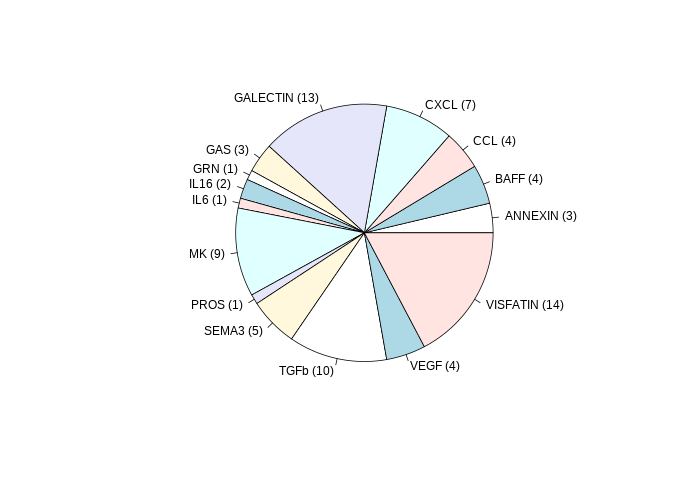

In [63]:
%%R -w 700
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs,")")
pie(counts_pathway_ssg$LR_pairs, labels = paste0(counts_pathway_ssg$annotation,pie_labels))

In [64]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_SSG_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs,")")
pie(counts_pathway_ssg$LR_pairs, labels = paste0(counts_pathway_ssg$annotation,pie_labels))
dev.off()

[1] 2


In [65]:
%%R
immune_net_ssg_pairs <- data.frame(interaction_name = immune_net_ssg$interaction_name,interaction_name_2 = immune_net_ssg$interaction_name_2)
immune_net_ssg_pairs

      interaction_name      interaction_name_2
1  TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2)
2   TNFSF13B_TNFRSF13B    TNFSF13B - TNFRSF13B
3        SEMA3C_PLXND1         SEMA3C - PLXND1
4   SEMA3C_NRP2_PLXNA2  SEMA3C - (NRP2+PLXNA2)
5         VEGFA_VEGFR2          VEGFA - VEGFR2
6             MDK_SDC2              MDK - SDC2
7      MDK_ITGA4_ITGB1     MDK - (ITGA4+ITGB1)
8             IL16_CD4              IL16 - CD4
9   TNFSF13B_TNFRSF13B    TNFSF13B - TNFRSF13B
10 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2)
11    SEMA3C_NRP1_NRP2    SEMA3C - (NRP1+NRP2)
12             MDK_NCL               MDK - NCL
13            GAS6_AXL              GAS6 - AXL
14             MDK_NCL               MDK - NCL
15     MDK_ITGA4_ITGB1     MDK - (ITGA4+ITGB1)
16  SEMA3C_NRP1_PLXNA2  SEMA3C - (NRP1+PLXNA2)
17 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2)
18      IL6_IL6R_IL6ST      IL6 - (IL6R+IL6ST)
19   NAMPT_ITGA5_ITGB1   NAMPT - (ITGA5+ITGB1)
20      VEGFA_VEGFR1R2        VEGFA - VEGFR1R2
21  SEMA3C_NR

R[write to console]: Comparing communications on a single object 




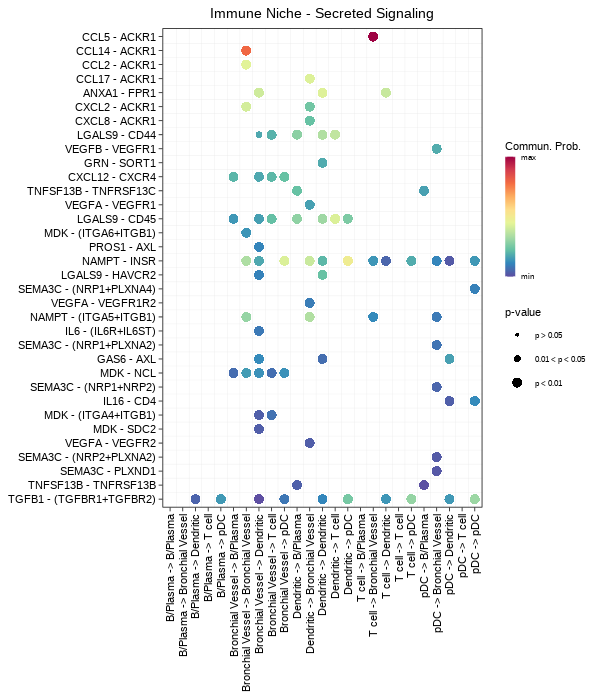

In [72]:
%%R -h 700 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = immune_net_ssg_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    title.name = "Immune Niche - Secreted Signaling"
)

In [75]:
%%R -h 700 -w 600 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = immune_net_ssg_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    title.name = "Immune Niche - Secreted Signaling",)
ggsave(filename="./figures/CellChat_IPF_ImmuneNiche_SSG_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 6 x 7 in image


In [32]:
%%R
## filter for only signifcant interactions
immune_net_ssg_test <- filter(immune_net_ssg, ligand == "CCL5")
str(immune_net_ssg_test)

'data.frame':	1 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 33
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11
 $ ligand            : chr "CCL5"
 $ receptor          : chr "ACKR1"
 $ prob              : num 0.145
 $ pval              : num 0
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 639
 $ interaction_name_2: chr "CCL5 - ACKR1"
 $ pathway_name      : chr "CCL"
 $ annotation        : chr "Secreted Signaling"
 $ evidence          : chr "PMID: 26740381"


In [33]:
%%R
pairLR.EPHA <- extractEnrichedLR(IPF, signaling = "CCL", geneLR.return = FALSE)
pairLR.EPHA
#LR.show <- pairLR.TNC[1,]

   interaction_name
1         CCL5_CCR1
2         CCL3_CCR1
3       CCL3L3_CCR1
4        CCL13_CCR1
5        CCL14_CCR1
6        CCL23_CCR1
7        CCL2_ACKR1
8        CCL5_ACKR1
9       CCL13_ACKR1
10      CCL14_ACKR1
11      CCL18_ACKR1
12       CCL2_ACKR2
13       CCL3_ACKR2
14       CCL4_ACKR2
15       CCL5_ACKR2
16      CCL13_ACKR2
17      CCL17_ACKR1
18      CCL14_ACKR2
19      CCL17_ACKR2


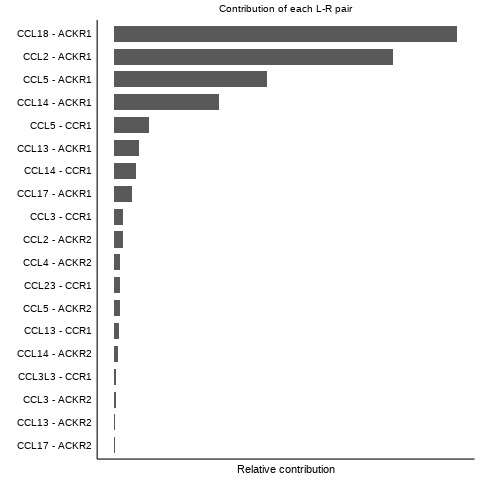

In [34]:
%%R
netAnalysis_contribution(IPF, signaling = "CCL")

[[1]]



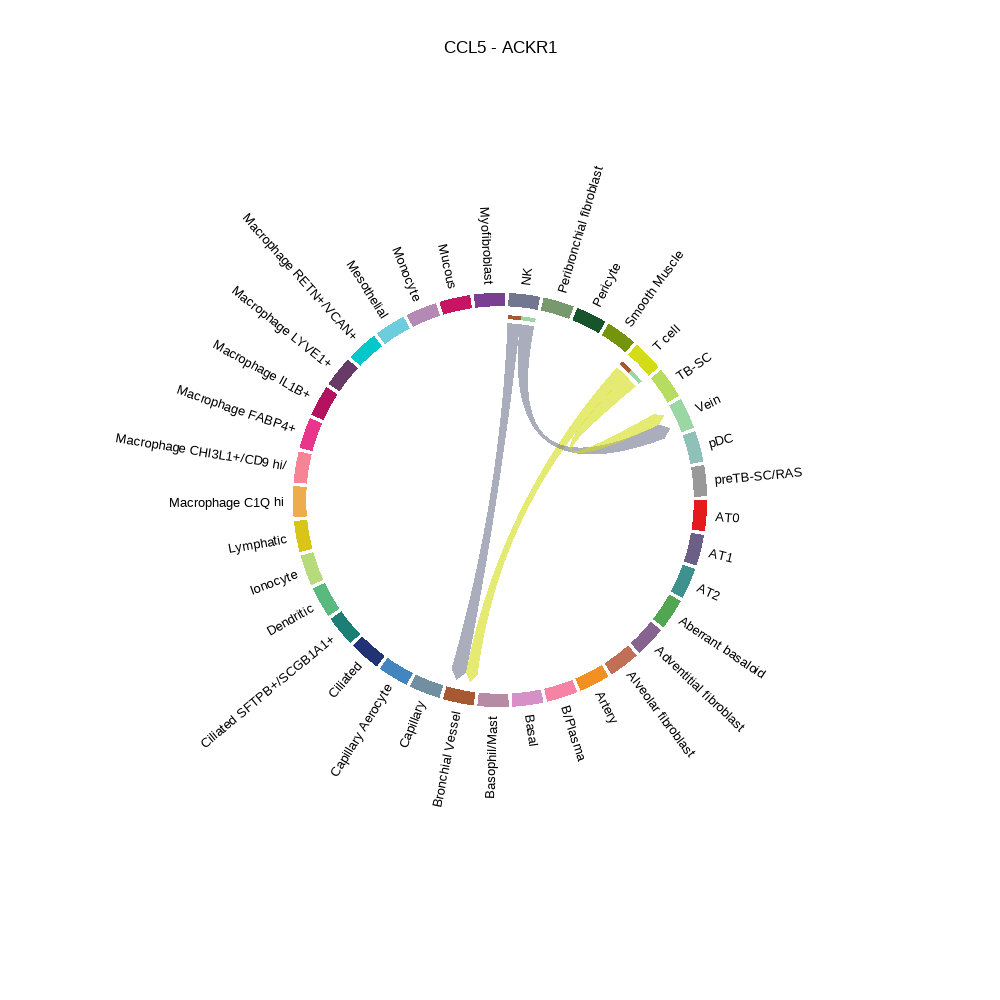

In [36]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "CCL", pairLR.use = "CCL5_ACKR1", layout = "chord")

In [40]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_SSG_CCL5_ACKR1_chord.pdf")
netVisual_individual(IPF, signaling = "CCL", pairLR.use = "CCL5_ACKR1", layout = "chord")
dev.off()

[1] 2


[[1]]



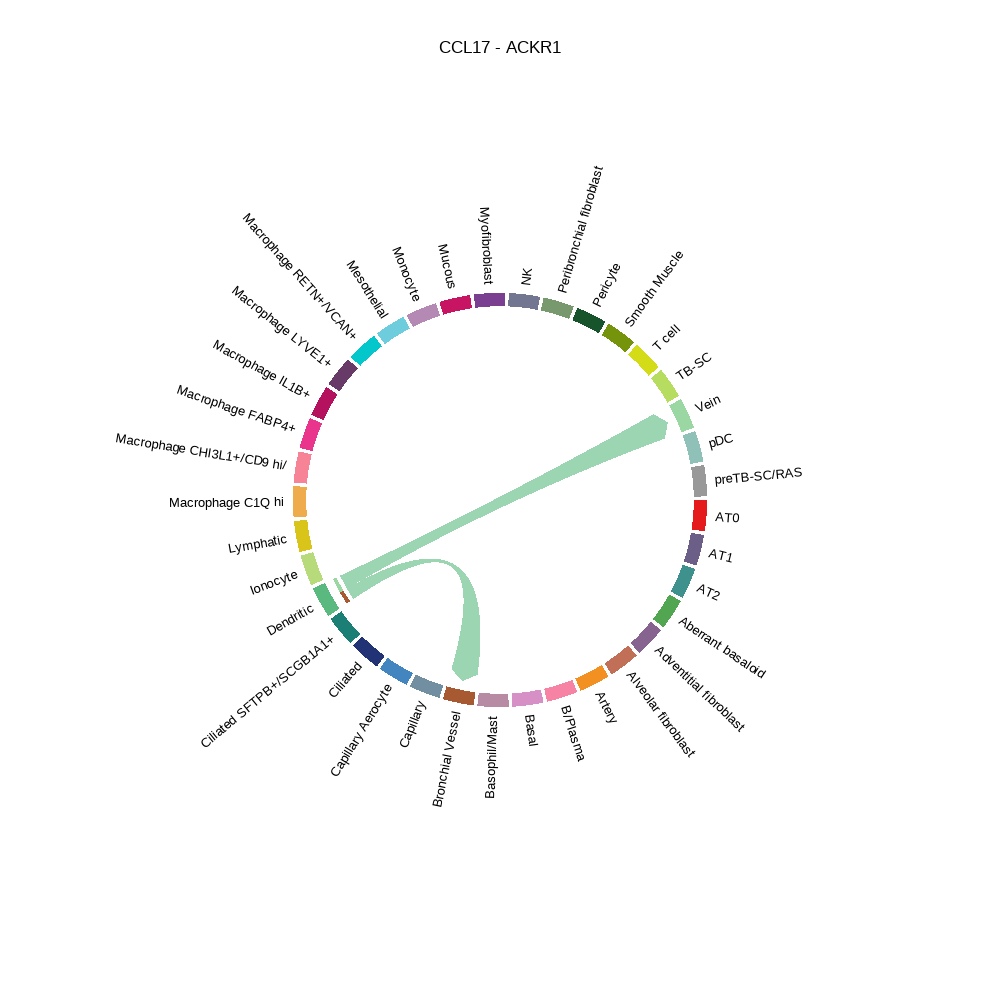

In [38]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "CCL", pairLR.use = "CCL17_ACKR1", layout = "chord")

In [39]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_SSG_CCL17_ACKR1_chord.pdf")
netVisual_individual(IPF, signaling = "CCL", pairLR.use = "CCL17_ACKR1", layout = "chord")
dev.off()

[1] 2


In [20]:
%%R
pairLR.EPHA <- extractEnrichedLR(IPF, signaling = "CXCL", geneLR.return = FALSE)
pairLR.EPHA
#LR.show <- pairLR.TNC[1,]

  interaction_name
1      CXCL1_ACKR1
2      CXCL2_ACKR1
3      CXCL3_ACKR1
4      CXCL5_ACKR1
5      CXCL6_ACKR1
6      CXCL8_ACKR1
7     CXCL12_CXCR4
8     CXCL12_ACKR3


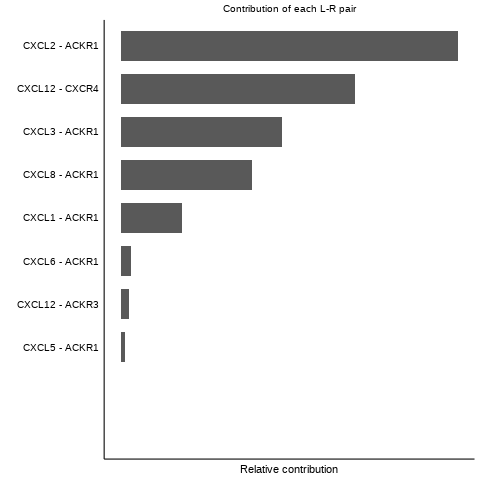

In [21]:
%%R
netAnalysis_contribution(IPF, signaling = "CXCL")

[[1]]



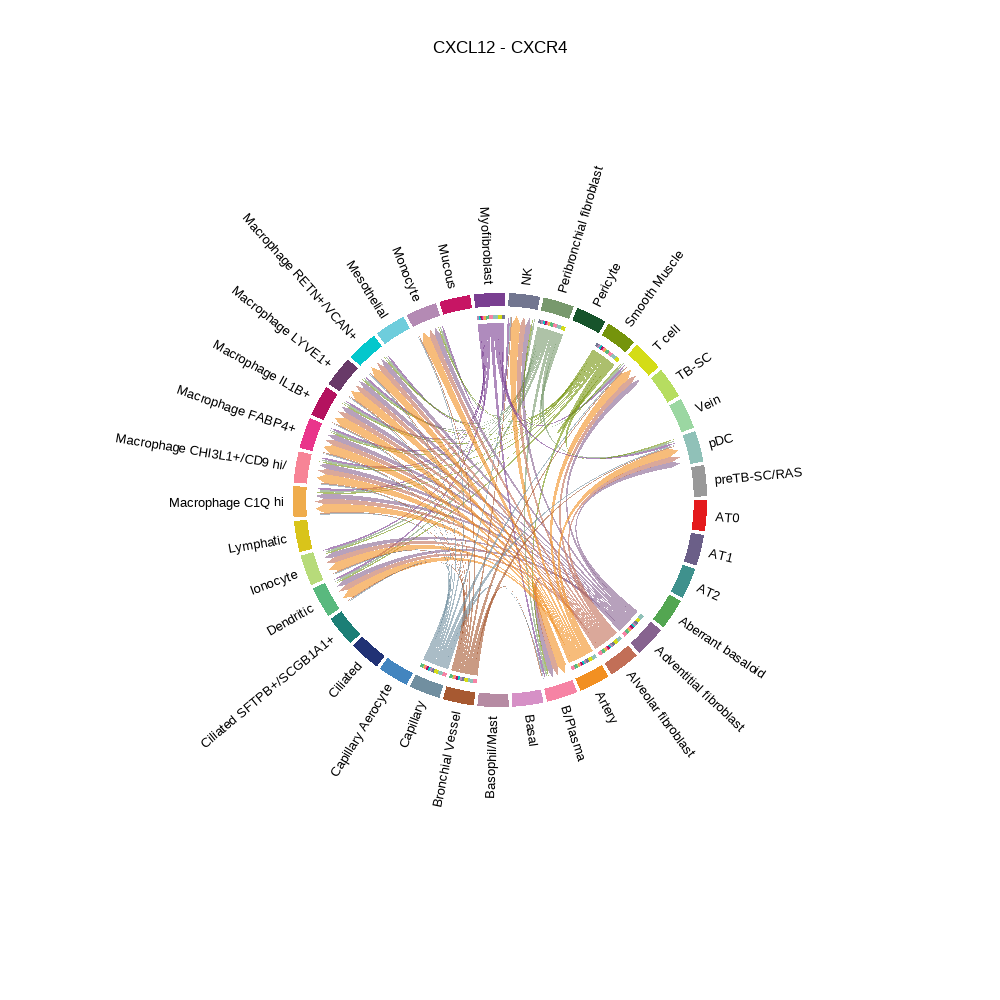

In [22]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "CXCL", pairLR.use = "CXCL12_CXCR4", layout = "chord")

In [23]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_SSG_CXCL12_CCR4_chord.pdf")
netVisual_individual(IPF, signaling = "CXCL", pairLR.use = "CXCL12_CXCR4", layout = "chord")
dev.off()

[1] 2


#### ECM receptor

In [77]:
%%R
## filter for only signifcant interactions
immune_net_ecm <- filter(sorted_immune_net, annotation == "ECM-Receptor")
str(immune_net_ecm)

'data.frame':	56 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 11 11 11 11 11 16 11 11 11 11 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 36 36 36 36 36 16 11 16 36 11 ...
 $ ligand            : chr  "LAMB2" "COL6A2" "LAMA5" "LAMA4" ...
 $ receptor          : chr  "CD44" "CD44" "CD44" "CD44" ...
 $ prob              : num  0.000937 0.001083 0.00109 0.001148 0.00119 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1381 1368 1379 1378 1380 1128 1352 1128 1383 1350 ...
 $ interaction_name_2: chr  "LAMB2 - CD44" "COL6A2 - CD44" "LAMA5 - CD44" "LAMA4 - CD44" ...
 $ pathway_name      : chr  "LAMININ" "COLLAGEN" "LAMININ" "LAMININ" ...
 $ annotation        : chr  "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" ...
 $ evidence          : chr  "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" ...


In [78]:
%%R
write.csv(immune_net_ecm, "/IPF_ImmuneNiche_ECM.csv")

In [79]:
%%R
(counts_pathway_ecm <- setNames(data.frame(table(immune_net_ecm$pathway_name)), c("annotation", "LR_pairs")))

  annotation LR_pairs
1   COLLAGEN       15
2        FN1        6
3    LAMININ       30
4       THBS        5


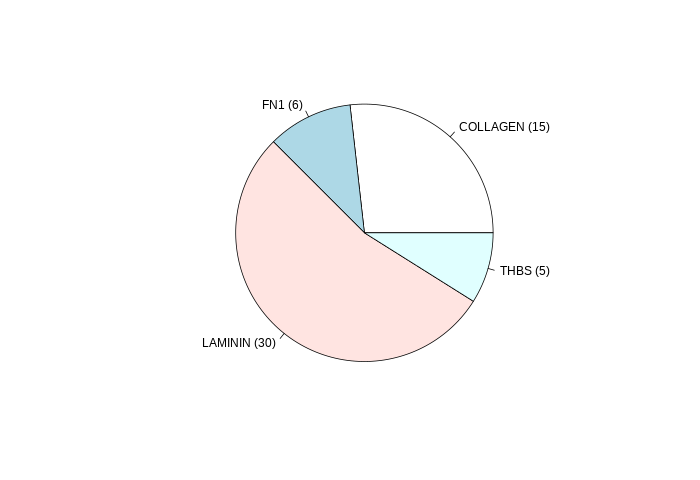

In [80]:
%%R -w 700
#pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs," = ", round(100 * counts_pathway_ecm$LR_pairs/sum(counts_pathway_ecm$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs,")")
pie(counts_pathway_ecm$LR_pairs, labels = paste0(counts_pathway_ecm$annotation,pie_labels))

In [81]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_ImmuneNiche_ECM_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs,")")
pie(counts_pathway_ecm$LR_pairs, labels = paste0(counts_pathway_ecm$annotation,pie_labels))
dev.off()

[1] 2


In [82]:
%%R
immune_net_ecm_pairs <- data.frame(interaction_name = immune_net_ecm$interaction_name,interaction_name_2 = immune_net_ecm$interaction_name_2)
immune_net_ecm_pairs

      interaction_name      interaction_name_2
1           LAMB2_CD44            LAMB2 - CD44
2          COL6A2_CD44           COL6A2 - CD44
3           LAMA5_CD44            LAMA5 - CD44
4           LAMA4_CD44            LAMA4 - CD44
5           LAMB1_CD44            LAMB1 - CD44
6      FN1_ITGA4_ITGB1     FN1 - (ITGA4+ITGB1)
7    LAMB2_ITGA6_ITGB4   LAMB2 - (ITGA6+ITGB4)
8      FN1_ITGA4_ITGB1     FN1 - (ITGA4+ITGB1)
9           LAMC1_CD44            LAMC1 - CD44
10   LAMA5_ITGA6_ITGB4   LAMA5 - (ITGA6+ITGB4)
11   LAMA4_ITGA6_ITGB4   LAMA4 - (ITGA6+ITGB4)
12   LAMB1_ITGA6_ITGB4   LAMB1 - (ITGA6+ITGB4)
13 COL6A2_ITGA10_ITGB1 COL6A2 - (ITGA10+ITGB1)
14   LAMC1_ITGA6_ITGB4   LAMC1 - (ITGA6+ITGB4)
15     FN1_ITGA4_ITGB1     FN1 - (ITGA4+ITGB1)
16     FN1_ITGA4_ITGB1     FN1 - (ITGA4+ITGB1)
17     FN1_ITGA5_ITGB1     FN1 - (ITGA5+ITGB1)
18     FN1_ITGA5_ITGB1     FN1 - (ITGA5+ITGB1)
19   LAMB2_ITGA6_ITGB1   LAMB2 - (ITGA6+ITGB1)
20          THBS1_CD36            THBS1 - CD36
21   LAMA5_IT

R[write to console]: Comparing communications on a single object 




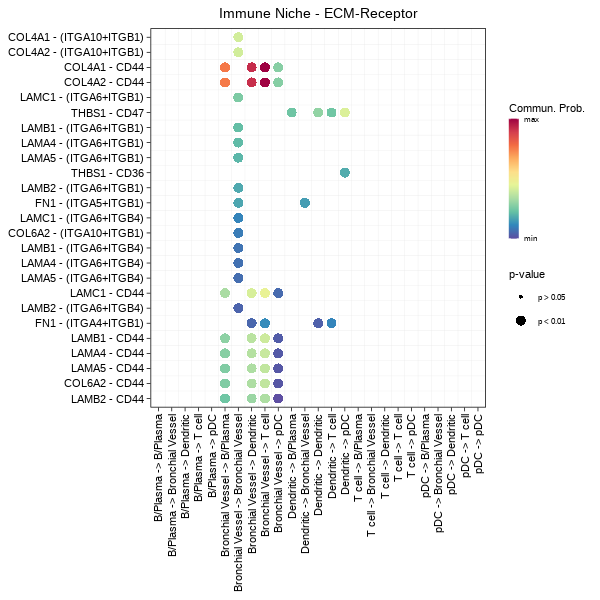

In [90]:
%%R -h 600 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = immune_net_ecm_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    title.name = "Immune Niche - ECM-Receptor"
)

In [91]:
%%R -h 600 -w 600 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = immune_net_ecm_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    targets.use = c("B/Plasma","Bronchial Vessel","Dendritic","pDC","T cell"),
    title.name = "Immune Niche - ECM-Receptor")
ggsave(filename="./figures/CellChat_IPF_ImmuneNiche_ECM_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 6 x 6 in image


# Fibrotic Niche

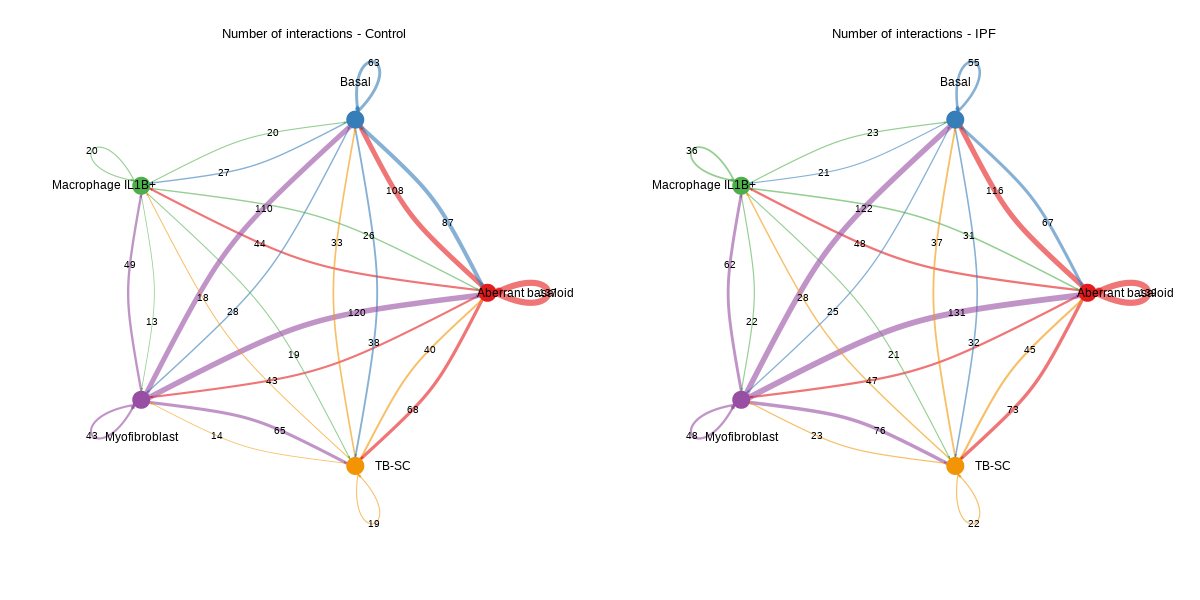

In [195]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - Control",
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - IPF",
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    remove.isolate=T
)


In [194]:
%%R -w 1200 -h 600
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_Circle_numbered.pdf")
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - Control",
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - IPF",
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    remove.isolate=T
)
dev.off()

[1] 2


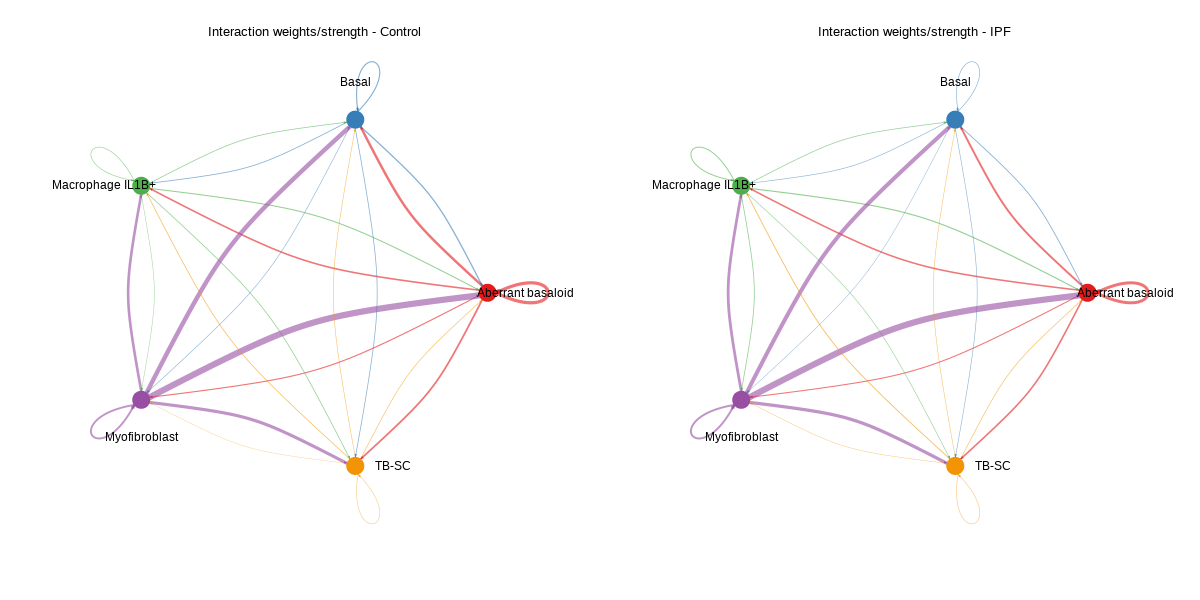

In [99]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$weight, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= F, 
    title.name = "Interaction weights/strength - Control",
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$weight, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= FALSE, 
    title.name = "Interaction weights/strength - IPF",
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    remove.isolate=T
)


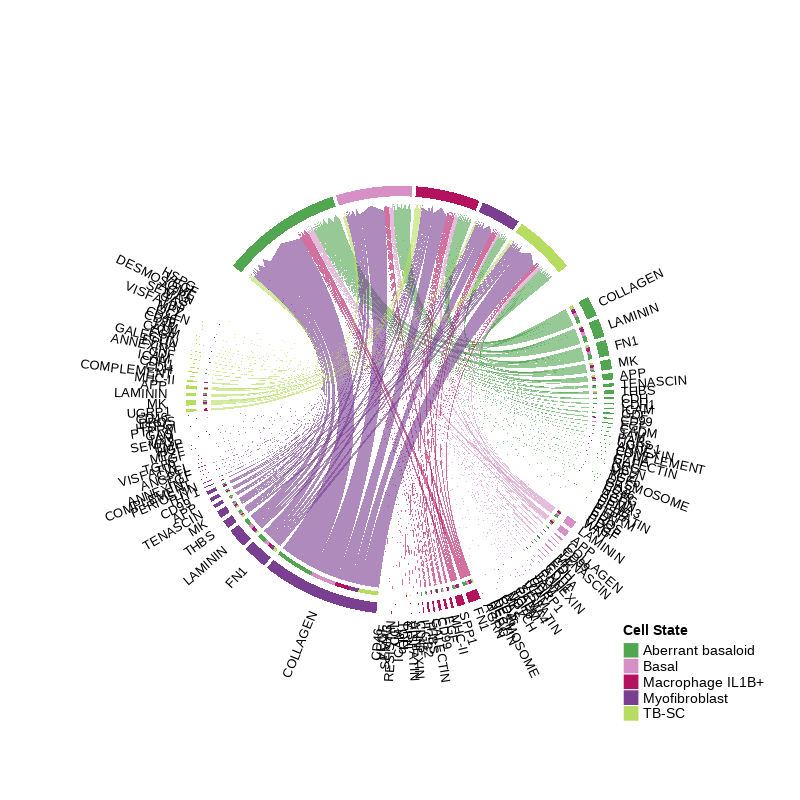

In [8]:
%%R -w 800 -h 800 -r 100
# show all the significant signaling pathways from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
netVisual_chord_gene(IPF,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    slot.name = "netP", legend.pos.x = 10,
    thresh = 0.01)

In [9]:
%%R
fibrotic_net <- subsetCommunication(IPF,       sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"))

In [10]:
%%R
## 3700 interactions is a lot...
str(fibrotic_net)

'data.frame':	1350 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 9 22 28 4 28 4 9 22 28 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ ligand            : chr  "TGFB1" "TGFB1" "TGFB1" "TGFB1" ...
 $ receptor          : chr  "TGFbR1_R2" "TGFbR1_R2" "TGFbR1_R2" "TGFbR1_R2" ...
 $ prob              : num  0.00174 0.001756 0.006521 0.000621 0.001995 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1 1 1 1 2 3 10 10 10 10 ...
 $ interaction_name_2: chr  "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" ...
 $ pathway_name      : chr  "TGFb" "TGFb" "TGFb" "TGFb" ...
 $ annotation        : chr  "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" ...
 $ evidence          : chr  "KEGG: hsa04350" "KEGG: hsa04350" "KEGG: hsa04350" "KEGG: hsa043

In [11]:
%%R
sorted_fibrotic_net <- fibrotic_net %>%
  arrange(prob)

In [12]:
%%R
head(sorted_fibrotic_net)

             source            target ligand  receptor         prob pval
1     Myofibroblast     Myofibroblast   JAM3      JAM3 0.0002019407    0
2             TB-SC     Myofibroblast  EFNA5     EPHA3 0.0003643422    0
3             Basal             Basal  MPZL1     MPZL1 0.0004201308    0
4 Aberrant basaloid Aberrant basaloid  EFNB2     EPHB4 0.0004359444    0
5     Myofibroblast Aberrant basaloid  TGFB3 TGFbR1_R2 0.0005168200    0
6             TB-SC             TB-SC  EFNA5     EPHA2 0.0005168865    0
     interaction_name      interaction_name_2 pathway_name         annotation
1           JAM3_JAM3             JAM3 - JAM3          JAM  Cell-Cell Contact
2         EFNA5_EPHA3           EFNA5 - EPHA3         EPHA  Cell-Cell Contact
3         MPZL1_MPZL1           MPZL1 - MPZL1          MPZ  Cell-Cell Contact
4         EFNB2_EPHB4           EFNB2 - EPHB4         EPHB  Cell-Cell Contact
5 TGFB3_TGFBR1_TGFBR2 TGFB3 - (TGFBR1+TGFBR2)         TGFb Secreted Signaling
6         EFNA5_EPHA2

In [13]:
%%R
## filter for only signifcant interactions
sorted_fibrotic_net <- filter(sorted_fibrotic_net, pval<0.01)

In [14]:
%%R
str(sorted_fibrotic_net)

'data.frame':	1347 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 28 34 9 4 28 34 34 4 4 34 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 28 28 9 4 4 34 4 4 9 9 ...
 $ ligand            : chr  "JAM3" "EFNA5" "MPZL1" "EFNB2" ...
 $ receptor          : chr  "JAM3" "EPHA3" "MPZL1" "EPHB4" ...
 $ prob              : num  0.000202 0.000364 0.00042 0.000436 0.000517 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1652 1602 1697 1617 3 1601 1603 410 1050 1697 ...
 $ interaction_name_2: chr  "JAM3 - JAM3" "EFNA5 - EPHA3" "MPZL1 - MPZL1" "EFNB2 - EPHB4" ...
 $ pathway_name      : chr  "JAM" "EPHA" "MPZ" "EPHB" ...
 $ annotation        : chr  "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" ...
 $ evidence          : chr  "KEGG: hsa04514" "PMID: 15114347" "KEGG: hsa04514" "PMID: 15114347" ...


In [ ]:
%%R
write.csv(sorted_spp1_net, "IPF_FibroticNiche_CellChat.csv")

In [90]:
%%R
unique(sorted_fibrotic_net$pathway_name)

 [1] "JAM"        "EPHA"       "MPZ"        "EPHB"       "TGFb"      
 [6] "WNT"        "PROS"       "CADM"       "NOTCH"      "NECTIN"    
[11] "AGRN"       "VEGF"       "HSPG"       "ANGPTL"     "LAMININ"   
[16] "SEMA4"      "EGF"        "COLLAGEN"   "GAS"        "PDGF"      
[21] "IGF"        "BMP"        "SEMA3"      "DESMOSOME"  "CD46"      
[26] "HGF"        "RESISTIN"   "EDN"        "THBS"       "PTPRM"     
[31] "TENASCIN"   "GDF"        "OCLN"       "CCL"        "VISFATIN"  
[36] "MK"         "ICAM"       "MHC-II"     "COMPLEMENT" "FGF"       
[41] "CD99"       "CDH"        "NRG"        "ITGB2"      "GALECTIN"  
[46] "PARs"       "CXCL"       "UGRP1"      "GRN"        "FN1"       
[51] "SPP1"       "ANNEXIN"    "CDH1"       "PERIOSTIN"  "THY1"      
[56] "CD45"       "APP"       


In [108]:
%%R
## count number of interactions per category... maybe a way to split plots?
(counts_annotation <- setNames(data.frame(table(sorted_fibrotic_net$annotation)), c("annotation", "LR_pairs")))

          annotation LR_pairs
1  Cell-Cell Contact      208
2       ECM-Receptor      839
3 Secreted Signaling      300


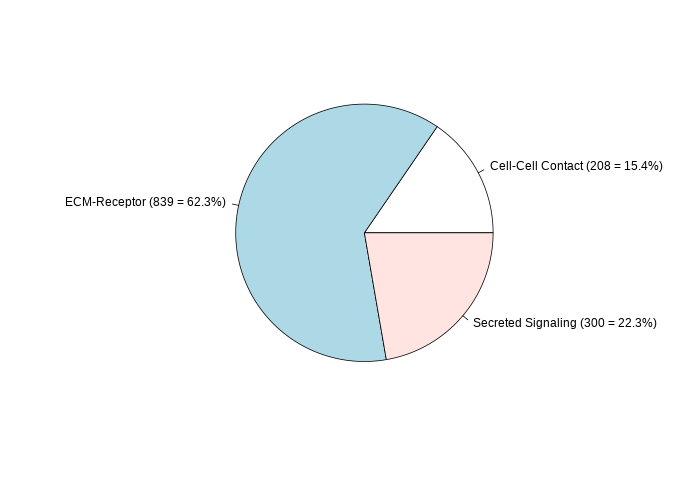

In [109]:
%%R -w 700
pie_labels <- paste0(counts_annotation$LR_pairs," = ", round(100 * counts_annotation$LR_pairs/sum(counts_annotation$LR_pairs), 1), "%")
pie(counts_annotation$LR_pairs, labels = paste0(counts_annotation$annotation," (", pie_labels,")"))

In [110]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_FibroticNicheNEW_annotation_pie.pdf")
pie_labels <- paste0(counts_annotation$LR_pairs," = ", round(100 * counts_annotation$LR_pairs/sum(counts_annotation$LR_pairs), 1), "%")
pie(counts_annotation$LR_pairs, labels = paste0(counts_annotation$annotation," (", pie_labels,")"))
dev.off()

[1] 2


#### cell cell contact

In [24]:
%%R
## filter for only signifcant interactions
fibrotic_net_ccc <- filter(sorted_fibrotic_net, annotation == "Cell-Cell Contact")
str(fibrotic_net_ccc)

'data.frame':	208 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 28 34 9 4 34 34 34 9 4 34 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 28 28 9 4 34 4 9 34 4 28 ...
 $ ligand            : chr  "JAM3" "EFNA5" "MPZL1" "EFNB2" ...
 $ receptor          : chr  "JAM3" "EPHA3" "MPZL1" "EPHB4" ...
 $ prob              : num  0.000202 0.000364 0.00042 0.000436 0.000517 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1652 1602 1697 1617 1601 1603 1697 1697 1613 1647 ...
 $ interaction_name_2: chr  "JAM3 - JAM3" "EFNA5 - EPHA3" "MPZL1 - MPZL1" "EFNB2 - EPHB4" ...
 $ pathway_name      : chr  "JAM" "EPHA" "MPZ" "EPHB" ...
 $ annotation        : chr  "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" ...
 $ evidence          : chr  "KEGG: hsa04514" "PMID: 15114347" "KEGG: hsa04514" "PMID: 15114347" ...


In [112]:
%%R
write.csv(fibrotic_net_ccc, "IPF_FibroticNiche_NEW_CCC.csv")

In [18]:
%%R
## a lot of different pathways... but some with only one LR_Pair! Filter here for pathways with at least ... 3? pairs?
(counts_pathway_ccc <- setNames(data.frame(table(fibrotic_net_ccc$pathway_name)), c("annotation", "LR_pairs")))

   annotation LR_pairs
1         APP       17
2        CADM        9
3        CD45        1
4        CD46        5
5        CD99       20
6         CDH       10
7        CDH1        6
8   DESMOSOME        6
9        EPHA       33
10       EPHB        3
11       ICAM        8
12      ITGB2        4
13        JAM       17
14     MHC-II       32
15        MPZ       16
16     NECTIN        2
17      NOTCH        5
18       OCLN        4
19      PTPRM        4
20      SEMA4        4
21       THY1        2


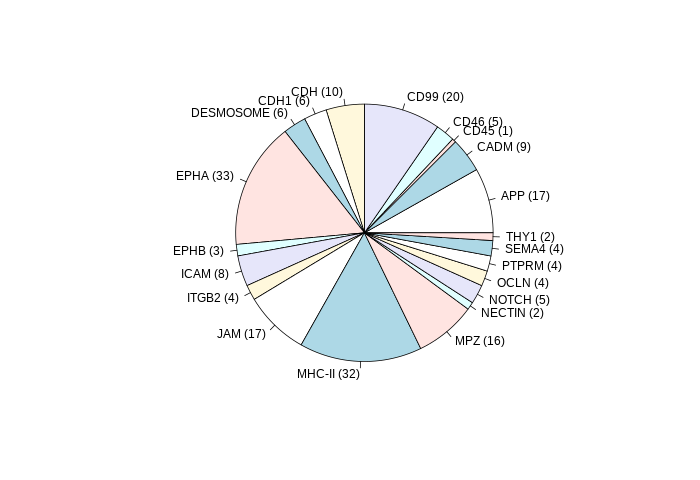

In [20]:
%%R -w 700
#pie_labels <- paste0(" (",counts_pathway_ccc$LR_pairs," = ", round(100 * counts_pathway_ccc$LR_pairs/sum(counts_pathway_ccc$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ccc$LR_pairs,")")
pie(counts_pathway_ccc$LR_pairs, labels = paste0(counts_pathway_ccc$annotation,pie_labels))

In [21]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_CCC_pathways_pie.pdf")
pie_labels <- paste0(" (",counts_pathway_ccc$LR_pairs,")")
pie(counts_pathway_ccc$LR_pairs, labels = paste0(counts_pathway_ccc$annotation,pie_labels))
dev.off()

[1] 2


In [118]:
%%R
fibrotic_net_ccc_pairs <- data.frame(interaction_name = fibrotic_net_ccc$interaction_name,interaction_name_2 = fibrotic_net_ccc$interaction_name_2)
fibrotic_net_ccc_pairs

     interaction_name    interaction_name_2
1           JAM3_JAM3           JAM3 - JAM3
2         EFNA5_EPHA3         EFNA5 - EPHA3
3         MPZL1_MPZL1         MPZL1 - MPZL1
4         EFNB2_EPHB4         EFNB2 - EPHB4
5         EFNA5_EPHA2         EFNA5 - EPHA2
6         EFNA5_EPHA4         EFNA5 - EPHA4
7         MPZL1_MPZL1         MPZL1 - MPZL1
8         MPZL1_MPZL1         MPZL1 - MPZL1
9         EFNB2_EPHA4         EFNB2 - EPHA4
10          F11R_JAM3           F11R - JAM3
11          JAM3_F11R           JAM3 - F11R
12        CADM1_CADM1         CADM1 - CADM1
13        JAG1_NOTCH1         JAG1 - NOTCH1
14    NECTIN1_NECTIN4     NECTIN1 - NECTIN4
15        EFNA5_EPHA2         EFNA5 - EPHA2
16        MPZL1_MPZL1         MPZL1 - MPZL1
17        EFNA5_EPHA2         EFNA5 - EPHA2
18      SEMA4A_PLXNB2       SEMA4A - PLXNB2
19        MPZL1_MPZL1         MPZL1 - MPZL1
20        MPZL1_MPZL1         MPZL1 - MPZL1
21        EFNA1_EPHA3         EFNA1 - EPHA3
22        EFNA1_EPHA3         EF

R[write to console]: Comparing communications on a single object 




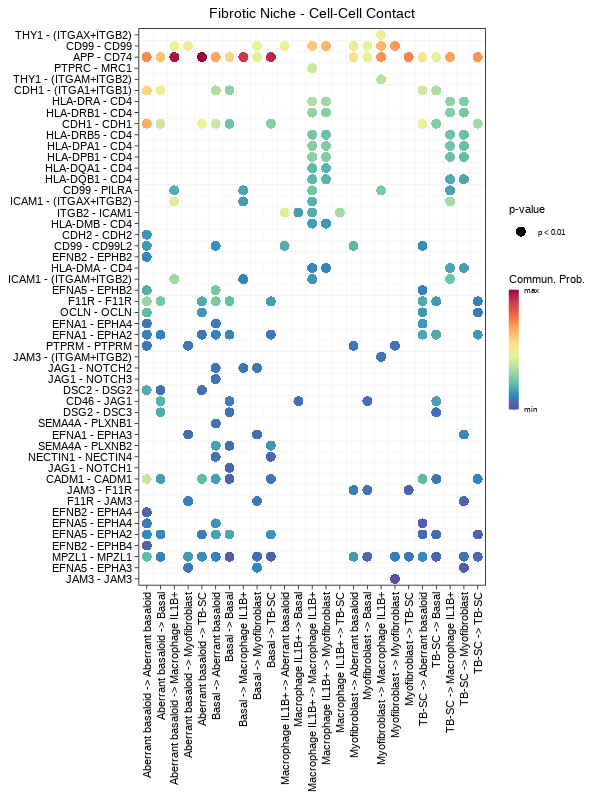

In [124]:
%%R -h 800 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ccc_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - Cell-Cell Contact" )

In [125]:
%%R
options(stringsAsFactors = FALSE)

In [126]:
%%R -h 800 -w 600 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ccc_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - Cell-Cell Contact" )
ggsave(filename="./figures/CellChat_IPF_FibroticNiche_NEW_CCC_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 6 x 8 in image


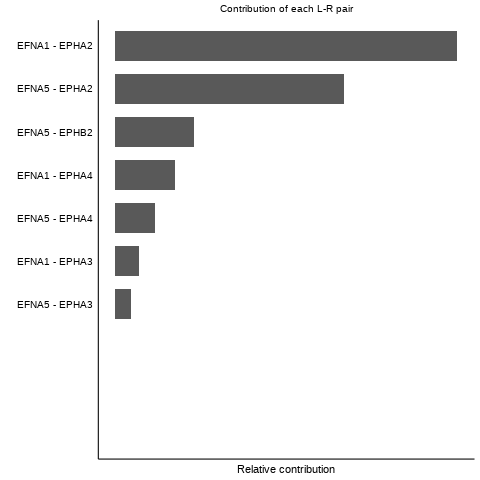

In [129]:
%%R
netAnalysis_contribution(IPF, signaling = "EPHA")

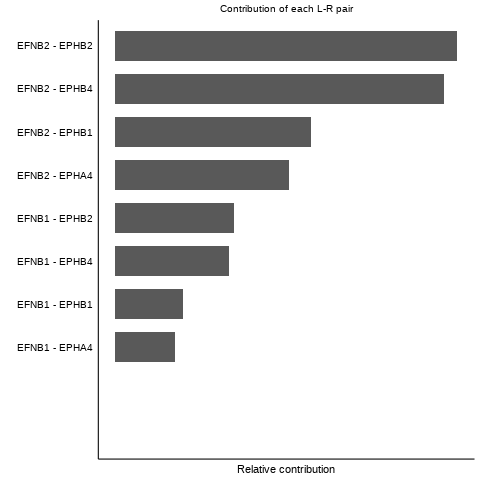

In [130]:
%%R
netAnalysis_contribution(IPF, signaling = "EPHB")

[[1]]



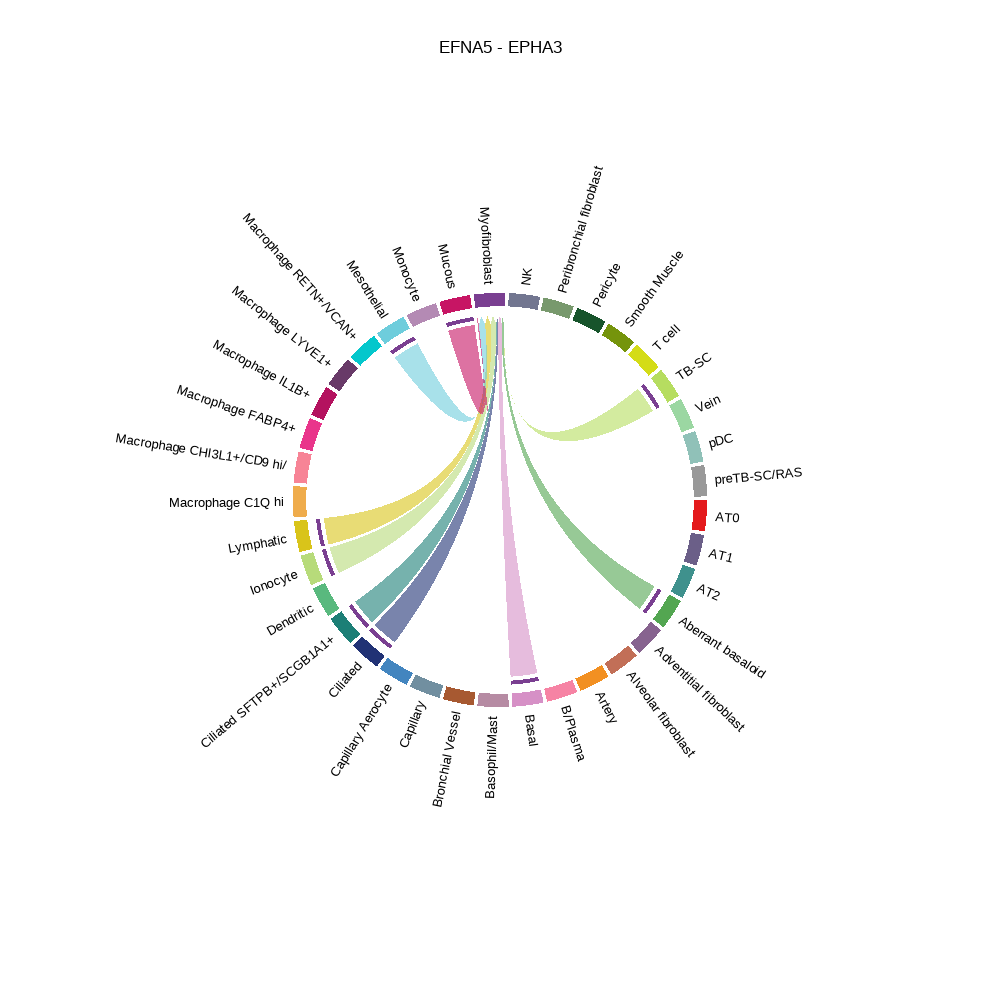

In [132]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "EPHA", pairLR.use = "EFNA5_EPHA3", layout = "chord")

In [133]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_SSG_EFNA5_EPHA3_chord.pdf")
netVisual_individual(IPF, signaling = "EPHA", pairLR.use = "EFNA5_EPHA3", layout = "chord")
dev.off()

[1] 2


[[1]]



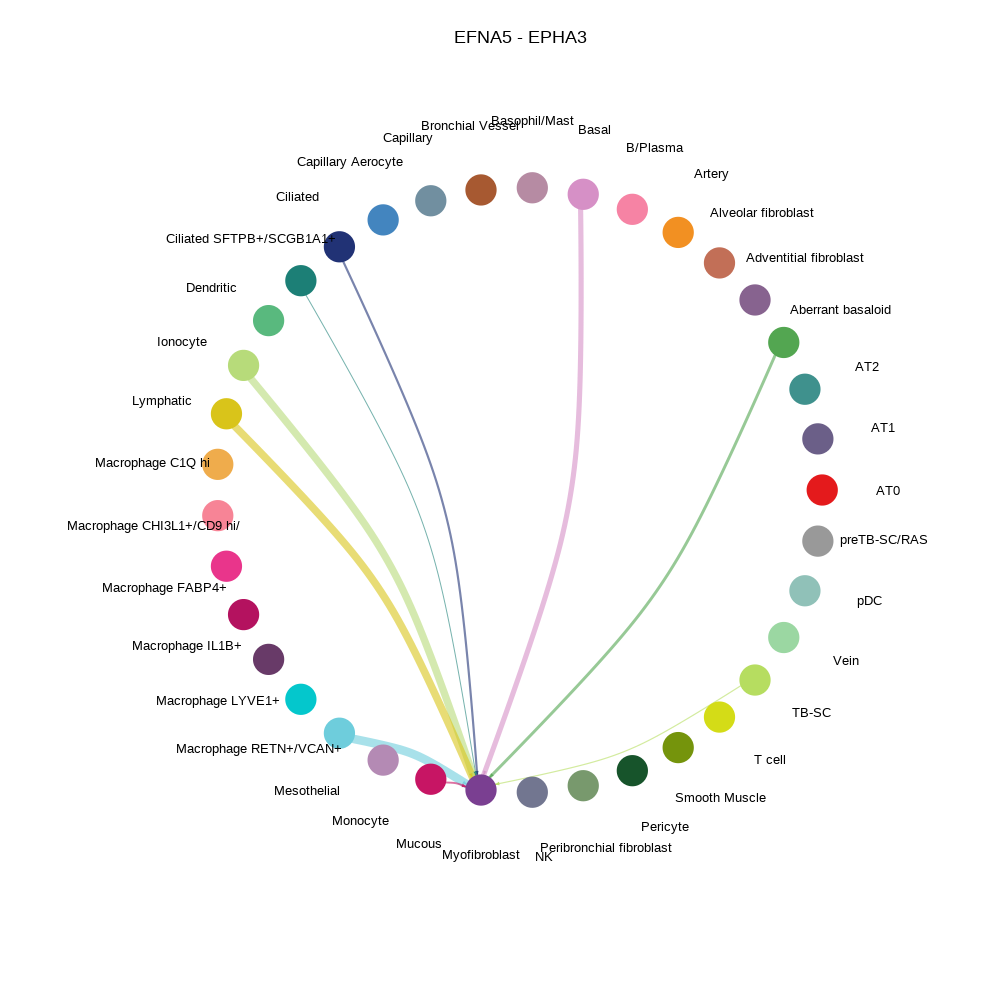

In [134]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "EPHA", pairLR.use = "EFNA5_EPHA3", layout = "circle")

In [26]:
%%R
## filter for only signifcant interactions
fibrotic_net_ccc_test <- filter(fibrotic_net_ccc, interaction_name == "CDH2_CDH2")
head(fibrotic_net_ccc_test)

             source            target ligand receptor        prob pval
1 Aberrant basaloid Aberrant basaloid   CDH2     CDH2 0.002965268    0
  interaction_name interaction_name_2 pathway_name        annotation
1        CDH2_CDH2        CDH2 - CDH2          CDH Cell-Cell Contact
        evidence
1 KEGG: hsa04514


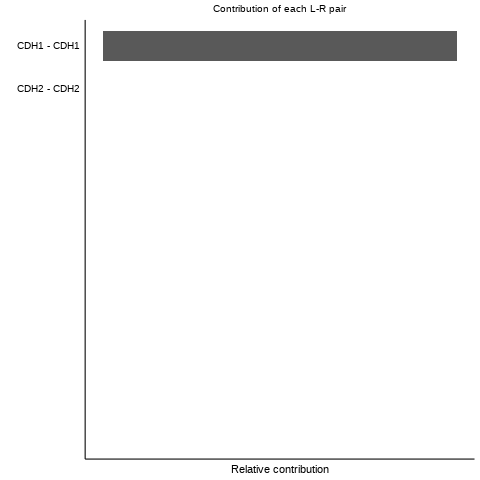

In [27]:
%%R
netAnalysis_contribution(IPF, signaling = "CDH")

In [28]:
%%R
pairLR.PDGF <- extractEnrichedLR(IPF, signaling = "CDH", geneLR.return = FALSE)
pairLR.PDGF
#LR.show <- pairLR.TNC[1,]

  interaction_name
1        CDH2_CDH2
2        CDH1_CDH1


[[1]]



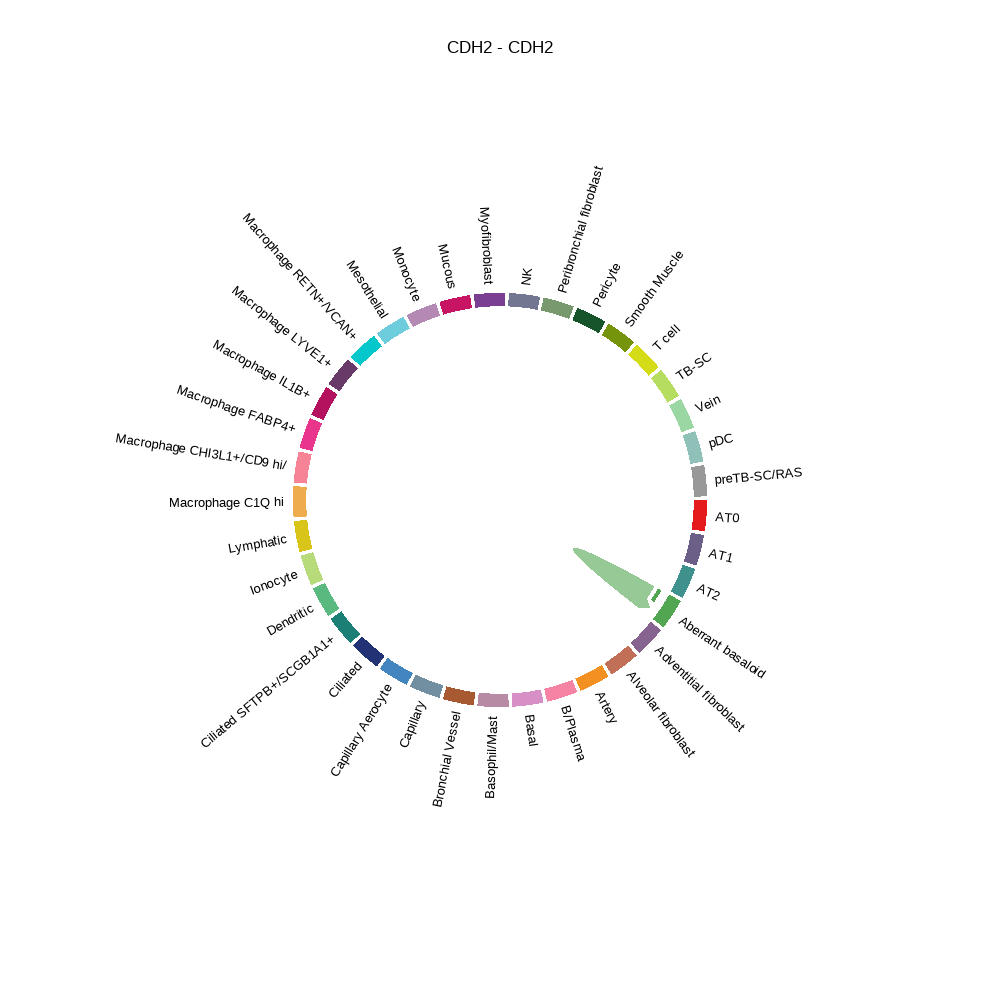

In [29]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "CDH", pairLR.use = "CDH2_CDH2", layout = "chord")

In [30]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_CCC_CDH2_CDH2_chord.pdf")
netVisual_individual(IPF, signaling = "CDH", pairLR.use = "CDH2_CDH2", layout = "chord")
dev.off()

[1] 2


#### Secreted Signaling

In [92]:
%%R
## filter for only signifcant interactions
fibrotic_net_ssg <- filter(sorted_fibrotic_net, annotation == "Secreted Signaling")
str(fibrotic_net_ssg)

'data.frame':	300 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 28 4 4 28 28 4 28 4 34 28 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 9 9 4 4 22 28 9 22 ...
 $ ligand            : chr  "TGFB3" "WNT7B" "PROS1" "PROS1" ...
 $ receptor          : chr  "TGFbR1_R2" "FZD6_LRP6" "AXL" "AXL" ...
 $ prob              : num  0.000517 0.000521 0.000553 0.000589 0.000621 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 3 410 1050 1050 1 574 813 495 1024 815 ...
 $ interaction_name_2: chr  "TGFB3 - (TGFBR1+TGFBR2)" "WNT7B - (FZD6+LRP6)" "PROS1 - AXL" "PROS1 - AXL" ...
 $ pathway_name      : chr  "TGFb" "WNT" "PROS" "PROS" ...
 $ annotation        : chr  "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" ...
 $ evidence          : chr  "KEGG: hsa04350" "KEGG: hsa04310; PMID: 23209147" "PMID: 29531161" "PMID: 29531161" ..

In [136]:
%%R
write.csv(fibrotic_net_ssg, "IPF_FibroticNiche_NEW_SSG.csv")

In [137]:
%%R
(counts_pathway_ssg <- setNames(data.frame(table(fibrotic_net_ssg$pathway_name)), c("annotation", "LR_pairs")))

   annotation LR_pairs
1      ANGPTL       15
2     ANNEXIN        5
3         BMP        5
4         CCL        2
5  COMPLEMENT        9
6        CXCL        1
7         EDN        1
8         EGF       48
9         FGF        4
10   GALECTIN        9
11        GAS       12
12        GDF       15
13        GRN        3
14        HGF        3
15        IGF        6
16         MK       76
17        NRG        4
18       PARs        4
19       PDGF        1
20  PERIOSTIN        2
21       PROS        4
22   RESISTIN        5
23      SEMA3       21
24       SPP1       15
25       TGFb       12
26      UGRP1        3
27       VEGF        3
28   VISFATIN       11
29        WNT        1


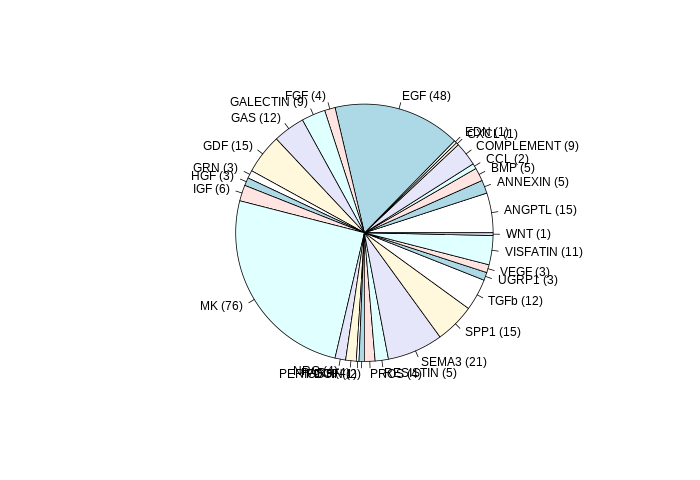

In [141]:
%%R -w 700
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs,")")
pie(counts_pathway_ssg$LR_pairs, labels = paste0(counts_pathway_ssg$annotation,pie_labels))

In [142]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_SSG_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs,")")
pie(counts_pathway_ssg$LR_pairs, labels = paste0(counts_pathway_ssg$annotation,pie_labels))
dev.off()

[1] 2


In [143]:
%%R
fibrotic_net_ssg_pairs <- data.frame(interaction_name = fibrotic_net_ssg$interaction_name,interaction_name_2 = fibrotic_net_ssg$interaction_name_2)
fibrotic_net_ssg_pairs

       interaction_name      interaction_name_2
1   TGFB3_TGFBR1_TGFBR2 TGFB3 - (TGFBR1+TGFBR2)
2       WNT7B_FZD6_LRP6     WNT7B - (FZD6+LRP6)
3             PROS1_AXL             PROS1 - AXL
4             PROS1_AXL             PROS1 - AXL
5   TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2)
6          VEGFA_VEGFR2          VEGFA - VEGFR2
7          ANGPTL1_PIRB          ANGPTL1 - PIRB
8            HBEGF_EGFR            HBEGF - EGFR
9              GAS6_AXL              GAS6 - AXL
10  ANGPTL4_ITGA5_ITGB1 ANGPTL4 - (ITGA5+ITGB1)
11         PDGFA_PDGFRB          PDGFA - PDGFRB
12           IGF1_IGF1R            IGF1 - IGF1R
13             GAS6_AXL              GAS6 - AXL
14    BMP5_BMPR1B_BMPR2   BMP5 - (BMPR1B+BMPR2)
15           HBEGF_EGFR            HBEGF - EGFR
16         ANGPTL4_SDC4          ANGPTL4 - SDC4
17           IGF1_IGF1R            IGF1 - IGF1R
18            PROS1_AXL             PROS1 - AXL
19             GAS6_AXL              GAS6 - AXL
20           HBEGF_EGFR            HBEGF

R[write to console]: Comparing communications on a single object 




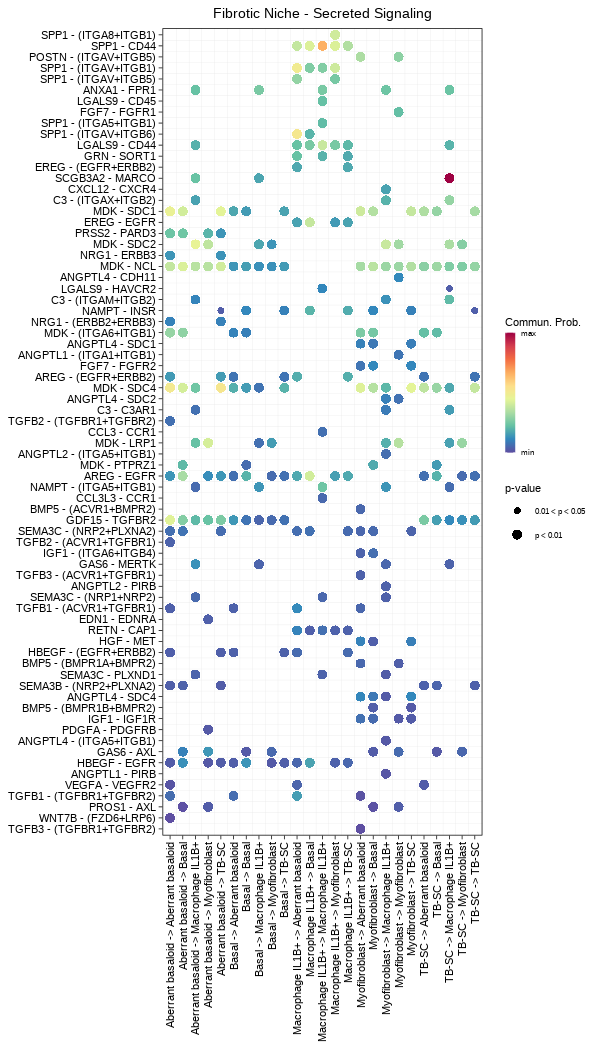

In [151]:
%%R -h 1050 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ssg_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - Secreted Signaling"
)

In [153]:
%%R -h 1050 -w 600 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ssg_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - Secreted Signaling")
ggsave(filename="./figures/CellChat_IPF_FibroticNiche_NEW_SSG_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 6 x 10.5 in image


In [93]:
%%R
head(fibrotic_net_ssg)

             source            target ligand  receptor         prob pval
1     Myofibroblast Aberrant basaloid  TGFB3 TGFbR1_R2 0.0005168200    0
2 Aberrant basaloid Aberrant basaloid  WNT7B FZD6_LRP6 0.0005208147    0
3 Aberrant basaloid             Basal  PROS1       AXL 0.0005533529    0
4     Myofibroblast             Basal  PROS1       AXL 0.0005891097    0
5     Myofibroblast Aberrant basaloid  TGFB1 TGFbR1_R2 0.0006208347    0
6 Aberrant basaloid Aberrant basaloid  VEGFA       KDR 0.0006968429    0
     interaction_name      interaction_name_2 pathway_name         annotation
1 TGFB3_TGFBR1_TGFBR2 TGFB3 - (TGFBR1+TGFBR2)         TGFb Secreted Signaling
2     WNT7B_FZD6_LRP6     WNT7B - (FZD6+LRP6)          WNT Secreted Signaling
3           PROS1_AXL             PROS1 - AXL         PROS Secreted Signaling
4           PROS1_AXL             PROS1 - AXL         PROS Secreted Signaling
5 TGFB1_TGFBR1_TGFBR2 TGFB1 - (TGFBR1+TGFBR2)         TGFb Secreted Signaling
6        VEGFA_VEGFR2

In [110]:
%%R
## filter for only signifcant interactions
fibrotic_net_ssg_test <- filter(fibrotic_net_ssg, interaction_name == "BMP5_ACVR1_BMPR2")
head(fibrotic_net_ssg_test)

         source            target ligand    receptor        prob pval
1 Myofibroblast Aberrant basaloid   BMP5 ACVR1_BMPR2 0.001477549    0
  interaction_name   interaction_name_2 pathway_name         annotation
1 BMP5_ACVR1_BMPR2 BMP5 - (ACVR1+BMPR2)          BMP Secreted Signaling
                       evidence
1 KEGG: hsa04350; PMID:26893264


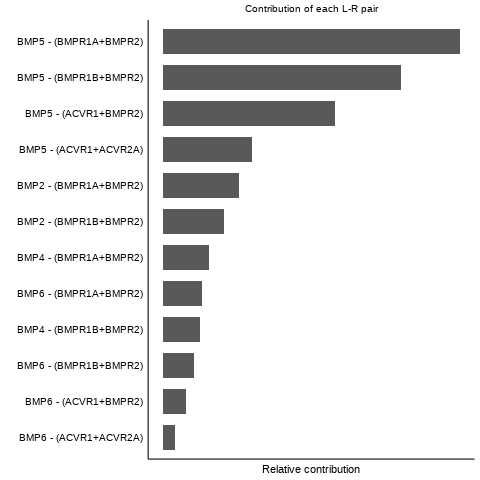

In [111]:
%%R
netAnalysis_contribution(IPF, signaling = "BMP")

In [112]:
%%R
pairLR.BMP <- extractEnrichedLR(IPF, signaling = "BMP", geneLR.return = FALSE)
pairLR.BMP
#LR.show <- pairLR.TNC[1,]

    interaction_name
1  BMP2_BMPR1A_BMPR2
2  BMP2_BMPR1B_BMPR2
3  BMP4_BMPR1A_BMPR2
4  BMP4_BMPR1B_BMPR2
5  BMP5_ACVR1_ACVR2A
6   BMP5_ACVR1_BMPR2
7  BMP5_BMPR1A_BMPR2
8  BMP5_BMPR1B_BMPR2
9  BMP6_ACVR1_ACVR2A
10  BMP6_ACVR1_BMPR2
11 BMP6_BMPR1A_BMPR2
12 BMP6_BMPR1B_BMPR2


[[1]]



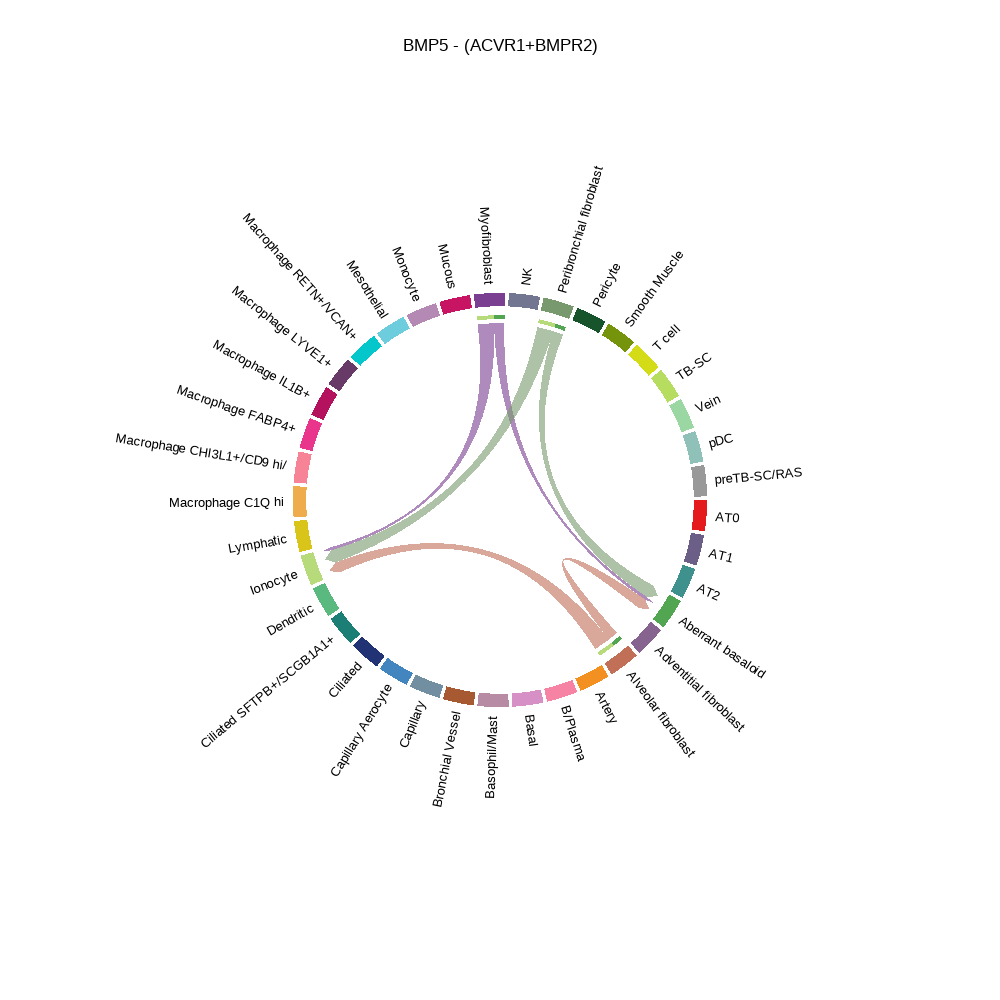

In [113]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "BMP", pairLR.use = "BMP5_ACVR1_BMPR2", layout = "chord")

In [114]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_SSG_BMP5_ACVR1_BMPR2_chord.pdf")
netVisual_individual(IPF, signaling = "BMP", pairLR.use = "BMP5_ACVR1_BMPR2", layout = "chord")
dev.off()

[1] 2


In [115]:
%%R
## filter for only signifcant interactions
fibrotic_net_ssg_test <- filter(fibrotic_net_ssg, interaction_name == "PDGFA_PDGFRB")
head(fibrotic_net_ssg_test)

             source        target ligand receptor         prob pval
1 Aberrant basaloid Myofibroblast  PDGFA   PDGFRB 0.0008541716    0
  interaction_name interaction_name_2 pathway_name         annotation
1     PDGFA_PDGFRB     PDGFA - PDGFRB         PDGF Secreted Signaling
        evidence
1 PMID: 15207812


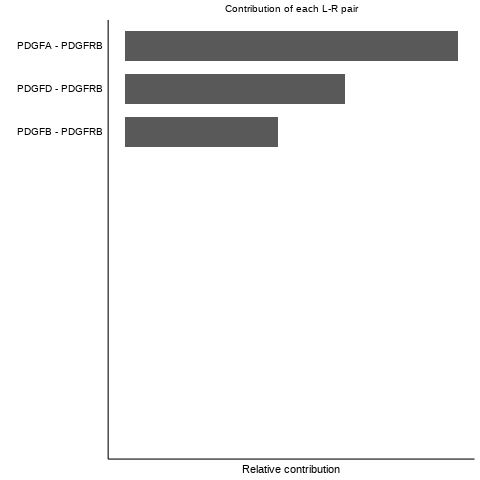

In [116]:
%%R
netAnalysis_contribution(IPF, signaling = "PDGF")

In [117]:
%%R
pairLR.PDGF <- extractEnrichedLR(IPF, signaling = "PDGF", geneLR.return = FALSE)
pairLR.PDGF
#LR.show <- pairLR.TNC[1,]

  interaction_name
1     PDGFA_PDGFRB
2     PDGFB_PDGFRB
3     PDGFD_PDGFRB


[[1]]



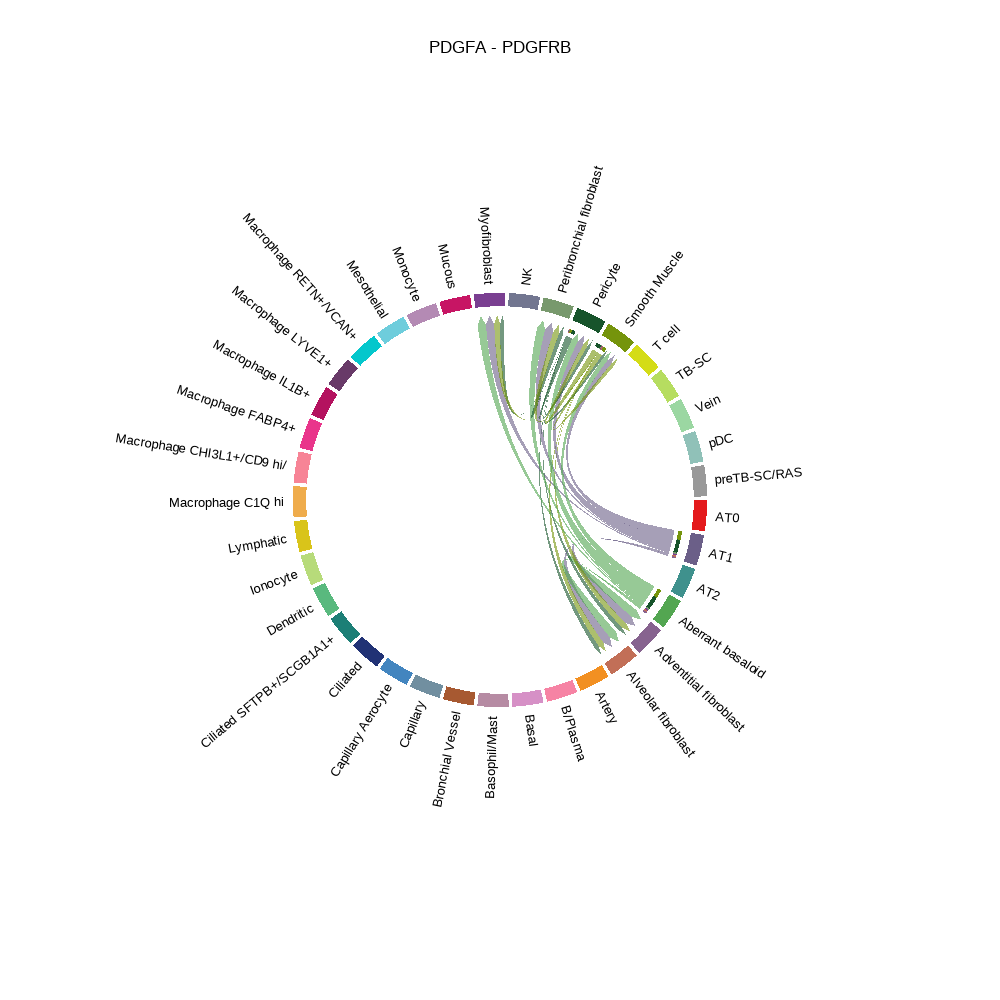

In [118]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "PDGF", pairLR.use = "PDGFA_PDGFRB", layout = "chord")

In [22]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_SSG_PDGFA_PDGFRB_chord.pdf")
netVisual_individual(IPF, signaling = "PDGF", pairLR.use = "PDGFA_PDGFRB", layout = "chord")
dev.off()

[1] 2


#### ECM receptor

In [155]:
%%R
## filter for only signifcant interactions
fibrotic_net_ecm <- filter(sorted_fibrotic_net, annotation == "ECM-Receptor")
str(fibrotic_net_ecm)

'data.frame':	839 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 9 9 4 34 4 4 4 28 9 34 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 4 4 4 9 9 4 4 4 ...
 $ ligand            : chr  "AGRN" "HSPG2" "LAMA3" "HSPG2" ...
 $ receptor          : chr  "DAG1" "DAG1" "ITGA6_ITGB4" "DAG1" ...
 $ prob              : num  0.000683 0.000714 0.000731 0.000751 0.000798 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1500 1501 1348 1501 1504 1332 1320 1352 1348 1352 ...
 $ interaction_name_2: chr  "AGRN - DAG1" "HSPG2 - DAG1" "LAMA3 - (ITGA6+ITGB4)" "HSPG2 - DAG1" ...
 $ pathway_name      : chr  "AGRN" "HSPG" "LAMININ" "HSPG" ...
 $ annotation        : chr  "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" ...
 $ evidence          : chr  "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" ...


In [156]:
%%R
write.csv(fibrotic_net_ccc, "/IPF_FibroticNiche_NEW_ECM.csv")

In [157]:
%%R

(counts_pathway_ecm <- setNames(data.frame(table(fibrotic_net_ecm$pathway_name)), c("annotation", "LR_pairs")))

  annotation LR_pairs
1       AGRN        3
2   COLLAGEN      300
3        FN1       75
4       HSPG        4
5    LAMININ      324
6   TENASCIN       40
7       THBS       93


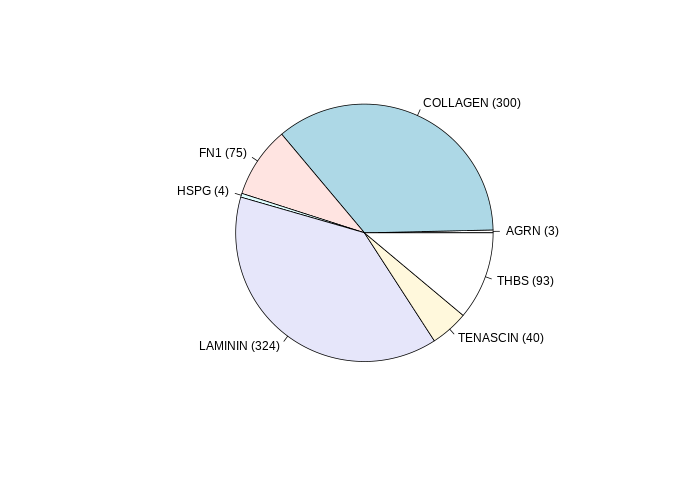

In [158]:
%%R -w 700
#pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs," = ", round(100 * counts_pathway_ecm$LR_pairs/sum(counts_pathway_ecm$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs,")")
pie(counts_pathway_ecm$LR_pairs, labels = paste0(counts_pathway_ecm$annotation,pie_labels))

In [159]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_FibroticNiche_NEW_ECM_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs,")")
pie(counts_pathway_ecm$LR_pairs, labels = paste0(counts_pathway_ecm$annotation,pie_labels))
dev.off()

[1] 2


##### divide into Collagen interactions and the rest!

In [160]:
%%R
## filter for only signifcant interactions
fibrotic_net_ecm_collagen <- filter(fibrotic_net_ecm, pathway_name == "COLLAGEN")
str(fibrotic_net_ecm_collagen)

'data.frame':	300 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 4 9 4 4 4 4 4 4 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 9 22 9 9 9 9 9 34 9 9 ...
 $ ligand            : chr  "COL4A1" "COL4A1" "COL6A1" "COL4A5" ...
 $ receptor          : chr  "ITGAV_ITGB8" "SDC4" "ITGAV_ITGB8" "ITGAV_ITGB8" ...
 $ prob              : num  0.000822 0.001056 0.001337 0.001393 0.001448 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1332 1416 1338 1336 1334 1335 1339 1174 1174 1333 ...
 $ interaction_name_2: chr  "COL4A1 - (ITGAV+ITGB8)" "COL4A1 - SDC4" "COL6A1 - (ITGAV+ITGB8)" "COL4A5 - (ITGAV+ITGB8)" ...
 $ pathway_name      : chr  "COLLAGEN" "COLLAGEN" "COLLAGEN" "COLLAGEN" ...
 $ annotation        : chr  "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" ...
 $ evidence          : chr  "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" "KEGG:

In [161]:
%%R
fibrotic_net_ecm_collagen_pairs <- data.frame(interaction_name = fibrotic_net_ecm_collagen$interaction_name,interaction_name_2 = fibrotic_net_ecm_collagen$interaction_name_2)
fibrotic_net_ecm_collagen_pairs

      interaction_name     interaction_name_2
1   COL4A1_ITGAV_ITGB8 COL4A1 - (ITGAV+ITGB8)
2          COL4A1_SDC4          COL4A1 - SDC4
3   COL6A1_ITGAV_ITGB8 COL6A1 - (ITGAV+ITGB8)
4   COL4A5_ITGAV_ITGB8 COL4A5 - (ITGAV+ITGB8)
5   COL4A3_ITGAV_ITGB8 COL4A3 - (ITGAV+ITGB8)
6   COL4A4_ITGAV_ITGB8 COL4A4 - (ITGAV+ITGB8)
7   COL6A2_ITGAV_ITGB8 COL6A2 - (ITGAV+ITGB8)
8   COL4A1_ITGA3_ITGB1 COL4A1 - (ITGA3+ITGB1)
9   COL4A1_ITGA3_ITGB1 COL4A1 - (ITGA3+ITGB1)
10  COL4A2_ITGAV_ITGB8 COL4A2 - (ITGAV+ITGB8)
11         COL6A1_SDC4          COL6A1 - SDC4
12         COL4A5_SDC4          COL4A5 - SDC4
13         COL4A3_SDC4          COL4A3 - SDC4
14         COL4A4_SDC4          COL4A4 - SDC4
15         COL6A2_SDC4          COL6A2 - SDC4
16  COL4A1_ITGA1_ITGB1 COL4A1 - (ITGA1+ITGB1)
17         COL4A2_SDC4          COL4A2 - SDC4
18  COL6A1_ITGA3_ITGB1 COL6A1 - (ITGA3+ITGB1)
19         COL4A1_CD44          COL4A1 - CD44
20  COL4A5_ITGA3_ITGB1 COL4A5 - (ITGA3+ITGB1)
21  COL6A1_ITGA3_ITGB1 COL6A1 - (I

R[write to console]: Comparing communications on a single object 




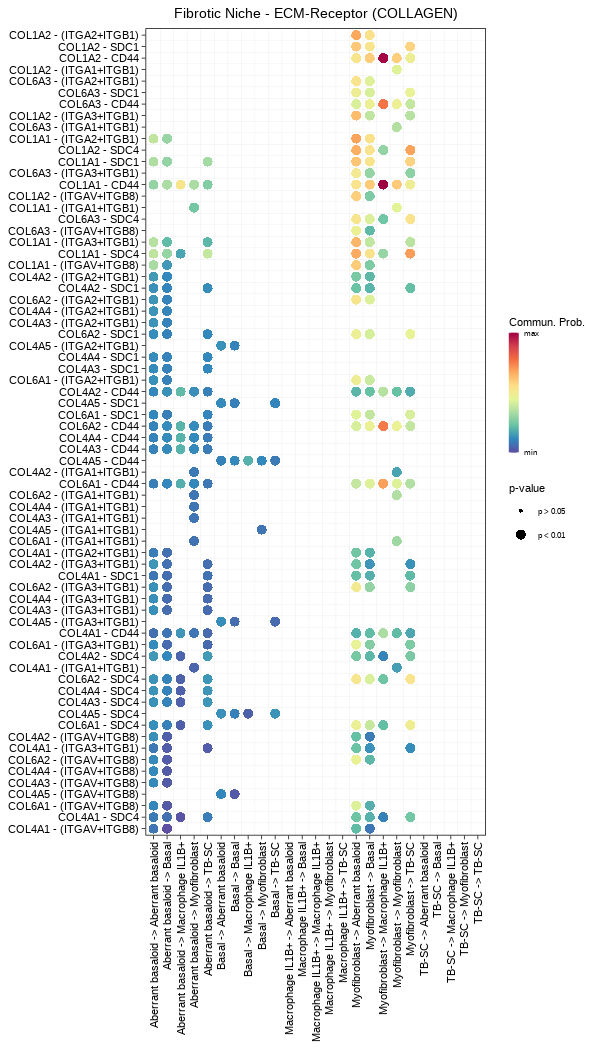

In [169]:
%%R -h 1050 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ecm_collagen_pairs,
    remove.isolate = F,
    thresh=0.01,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - ECM-Receptor (COLLAGEN)"
)

In [171]:
%%R -h 1050 -w 600 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ecm_collagen_pairs,
    remove.isolate = F,
    thresh=0.01,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - ECM-Receptor (COLLAGEN)")
ggsave(filename="./figures/CellChat_IPF_FibroticNiche_NEW_ECM_collagen_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 6 x 10.5 in image


##### divide into Collagen interactions, LAMININ and the rest!

In [172]:
%%R
## filter for only signifcant interactions
fibrotic_net_ecm_lam <- filter(fibrotic_net_ecm, pathway_name == "LAMININ")
str(fibrotic_net_ecm_lam)

'data.frame':	324 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 4 28 9 34 34 28 9 9 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 9 4 4 4 4 4 4 4 ...
 $ ligand            : chr  "LAMA3" "LAMA3" "LAMA3" "LAMB2" ...
 $ receptor          : chr  "ITGA6_ITGB4" "DAG1" "ITGAV_ITGB8" "ITGA6_ITGB4" ...
 $ prob              : num  0.000731 0.000798 0.000887 0.000953 0.000955 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1348 1504 1320 1352 1348 1352 1350 1508 1504 1355 ...
 $ interaction_name_2: chr  "LAMA3 - (ITGA6+ITGB4)" "LAMA3 - DAG1" "LAMA3 - (ITGAV+ITGB8)" "LAMB2 - (ITGA6+ITGB4)" ...
 $ pathway_name      : chr  "LAMININ" "LAMININ" "LAMININ" "LAMININ" ...
 $ annotation        : chr  "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" ...
 $ evidence          : chr  "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512"

In [173]:
%%R
fibrotic_net_ecm_lam_pairs <- data.frame(interaction_name = fibrotic_net_ecm_lam$interaction_name,interaction_name_2 = fibrotic_net_ecm_lam$interaction_name_2)
fibrotic_net_ecm_lam_pairs

     interaction_name    interaction_name_2
1   LAMA3_ITGA6_ITGB4 LAMA3 - (ITGA6+ITGB4)
2          LAMA3_DAG1          LAMA3 - DAG1
3   LAMA3_ITGAV_ITGB8 LAMA3 - (ITGAV+ITGB8)
4   LAMB2_ITGA6_ITGB4 LAMB2 - (ITGA6+ITGB4)
5   LAMA3_ITGA6_ITGB4 LAMA3 - (ITGA6+ITGB4)
6   LAMB2_ITGA6_ITGB4 LAMB2 - (ITGA6+ITGB4)
7   LAMA5_ITGA6_ITGB4 LAMA5 - (ITGA6+ITGB4)
8          LAMB2_DAG1          LAMB2 - DAG1
9          LAMA3_DAG1          LAMA3 - DAG1
10  LAMC2_ITGA6_ITGB4 LAMC2 - (ITGA6+ITGB4)
11         LAMB2_DAG1          LAMB2 - DAG1
12  LAMB2_ITGA6_ITGB4 LAMB2 - (ITGA6+ITGB4)
13  LAMB3_ITGA6_ITGB4 LAMB3 - (ITGA6+ITGB4)
14         LAMA5_DAG1          LAMA5 - DAG1
15  LAMA5_ITGA6_ITGB4 LAMA5 - (ITGA6+ITGB4)
16  LAMC1_ITGA6_ITGB4 LAMC1 - (ITGA6+ITGB4)
17         LAMC2_DAG1          LAMC2 - DAG1
18  LAMB2_ITGAV_ITGB8 LAMB2 - (ITGAV+ITGB8)
19  LAMA3_ITGAV_ITGB8 LAMA3 - (ITGAV+ITGB8)
20         LAMB2_DAG1          LAMB2 - DAG1
21         LAMB3_DAG1          LAMB3 - DAG1
22  LAMB2_ITGAV_ITGB8 LAMB2 - (I

R[write to console]: Comparing communications on a single object 




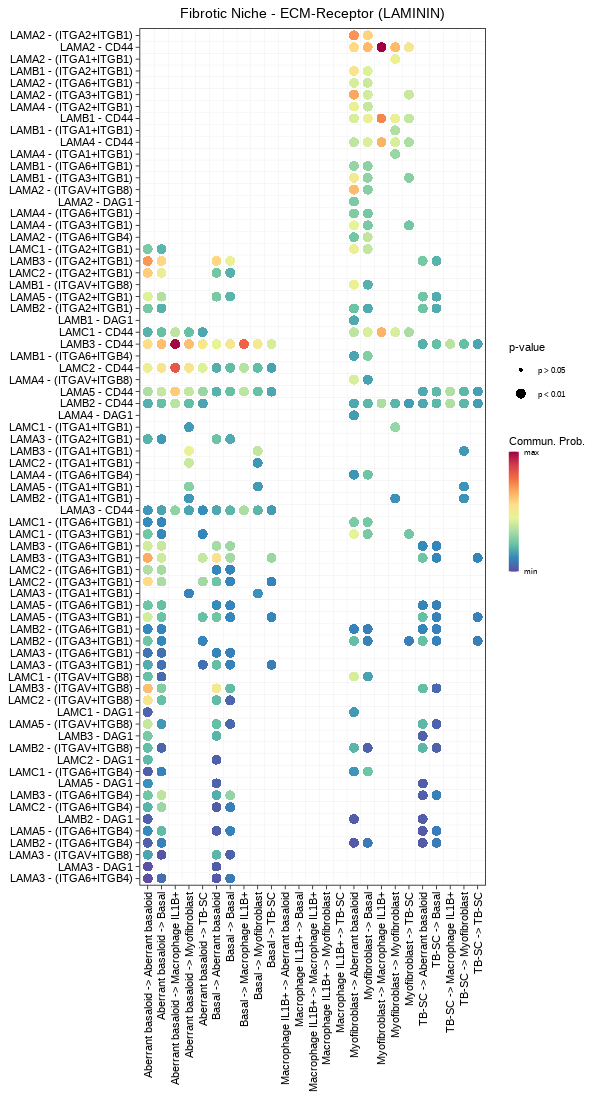

In [177]:
%%R -h 1100 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ecm_lam_pairs,
    remove.isolate = F,
    thresh=0.01,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - ECM-Receptor (LAMININ)"
)

In [178]:
%%R -h 1100 -w 600 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ecm_lam_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - ECM-Receptor (LAMININ)" )
ggsave(filename="./figures/CellChat_IPF_FibroticNiche_NEW_ECM_laminin_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 6 x 11 in image


##### divide into Collagen interactions, LAMININ and the rest!

In [179]:
%%R
## filter for only signifcant interactions
fibrotic_net_ecm_rest <- filter(fibrotic_net_ecm, pathway_name != "LAMININ")
str(fibrotic_net_ecm_rest)

'data.frame':	515 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 9 9 34 4 4 28 28 28 34 4 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 4 9 22 4 28 9 4 9 ...
 $ ligand            : chr  "AGRN" "HSPG2" "HSPG2" "COL4A1" ...
 $ receptor          : chr  "DAG1" "DAG1" "DAG1" "ITGAV_ITGB8" ...
 $ prob              : num  0.000683 0.000714 0.000751 0.000822 0.001056 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1500 1501 1501 1332 1416 1501 1497 1313 1500 1338 ...
 $ interaction_name_2: chr  "AGRN - DAG1" "HSPG2 - DAG1" "HSPG2 - DAG1" "COL4A1 - (ITGAV+ITGB8)" ...
 $ pathway_name      : chr  "AGRN" "HSPG" "HSPG" "COLLAGEN" ...
 $ annotation        : chr  "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" ...
 $ evidence          : chr  "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" ...


In [180]:
%%R
## filter for only signifcant interactions
fibrotic_net_ecm_rest <- filter(fibrotic_net_ecm_rest, pathway_name != "COLLAGEN")
str(fibrotic_net_ecm_rest)

'data.frame':	215 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 9 9 34 28 28 28 34 28 28 28 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 4 4 28 9 4 22 22 22 ...
 $ ligand            : chr  "AGRN" "HSPG2" "HSPG2" "HSPG2" ...
 $ receptor          : chr  "DAG1" "DAG1" "DAG1" "DAG1" ...
 $ prob              : num  0.000683 0.000714 0.000751 0.001101 0.001114 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1500 1501 1501 1501 1497 1313 1500 1437 1475 1434 ...
 $ interaction_name_2: chr  "AGRN - DAG1" "HSPG2 - DAG1" "HSPG2 - DAG1" "HSPG2 - DAG1" ...
 $ pathway_name      : chr  "AGRN" "HSPG" "HSPG" "HSPG" ...
 $ annotation        : chr  "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" ...
 $ evidence          : chr  "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" ...


In [181]:
%%R
fibrotic_net_ecm_rest_pairs <- data.frame(interaction_name = fibrotic_net_ecm_rest$interaction_name,interaction_name_2 = fibrotic_net_ecm_rest$interaction_name_2)
fibrotic_net_ecm_rest_pairs

     interaction_name    interaction_name_2
1           AGRN_DAG1           AGRN - DAG1
2          HSPG2_DAG1          HSPG2 - DAG1
3          HSPG2_DAG1          HSPG2 - DAG1
4          HSPG2_DAG1          HSPG2 - DAG1
5          THBS3_CD47          THBS3 - CD47
6    TNXB_ITGAV_ITGB6  TNXB - (ITGAV+ITGB6)
7           AGRN_DAG1           AGRN - DAG1
8          THBS3_SDC4          THBS3 - SDC4
9          THBS3_CD36          THBS3 - CD36
10          TNXB_SDC4           TNXB - SDC4
11          COMP_CD47           COMP - CD47
12    TNC_ITGAV_ITGB6   TNC - (ITGAV+ITGB6)
13  THBS3_ITGA3_ITGB1 THBS3 - (ITGA3+ITGB1)
14          COMP_SDC4           COMP - SDC4
15           TNC_SDC4            TNC - SDC4
16  THBS3_ITGA3_ITGB1 THBS3 - (ITGA3+ITGB1)
17          COMP_CD36           COMP - CD36
18         THBS1_SDC4          THBS1 - SDC4
19         THBS1_CD36          THBS1 - CD36
20   COMP_ITGA3_ITGB1  COMP - (ITGA3+ITGB1)
21   COMP_ITGA3_ITGB1  COMP - (ITGA3+ITGB1)
22         THBS1_SDC4          T

R[write to console]: Comparing communications on a single object 




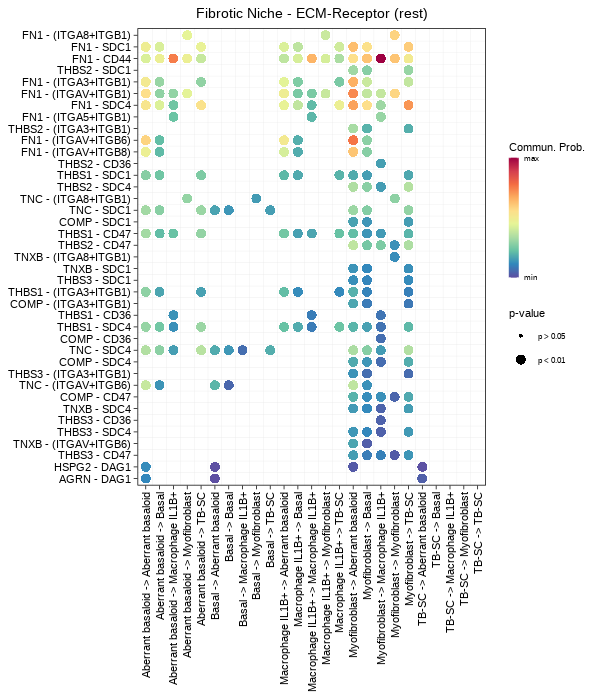

In [185]:
%%R -h 700 -w 600 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ecm_rest_pairs,
    remove.isolate = F,
    thresh=0.01,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - ECM-Receptor (rest)"
)

In [186]:
%%R -h 700 -w 600 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = fibrotic_net_ecm_rest_pairs,
    remove.isolate = F,
    thresh=0.01,
    sources.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    targets.use = c("Aberrant basaloid","Basal","TB-SC","Myofibroblast","Macrophage IL1B+"),
    title.name = "Fibrotic Niche - ECM-Receptor (rest)"
)
ggsave(filename="./figures/CellChat_IPF_FibroticNiche_NEW_ECM_rest_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 6 x 7 in image


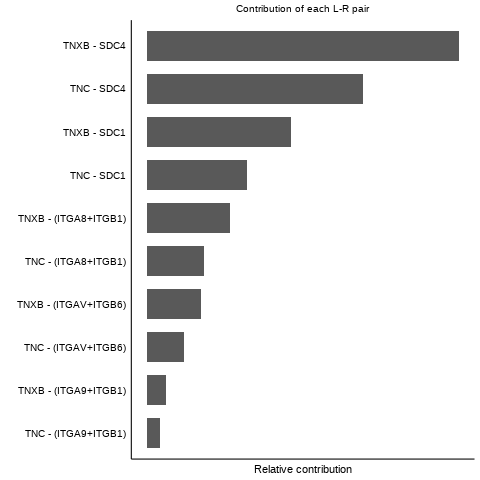

In [187]:
%%R
netAnalysis_contribution(IPF, signaling = "TENASCIN")

In [188]:
%%R
pairLR.TNC <- extractEnrichedLR(IPF, signaling = "TENASCIN", geneLR.return = FALSE)
pairLR.TNC
#LR.show <- pairLR.TNC[1,]

   interaction_name
1   TNC_ITGA8_ITGB1
2  TNXB_ITGA8_ITGB1
3   TNC_ITGA9_ITGB1
4  TNXB_ITGA9_ITGB1
5   TNC_ITGAV_ITGB6
6  TNXB_ITGAV_ITGB6
7          TNC_SDC1
8         TNXB_SDC1
9          TNC_SDC4
10        TNXB_SDC4


[[1]]



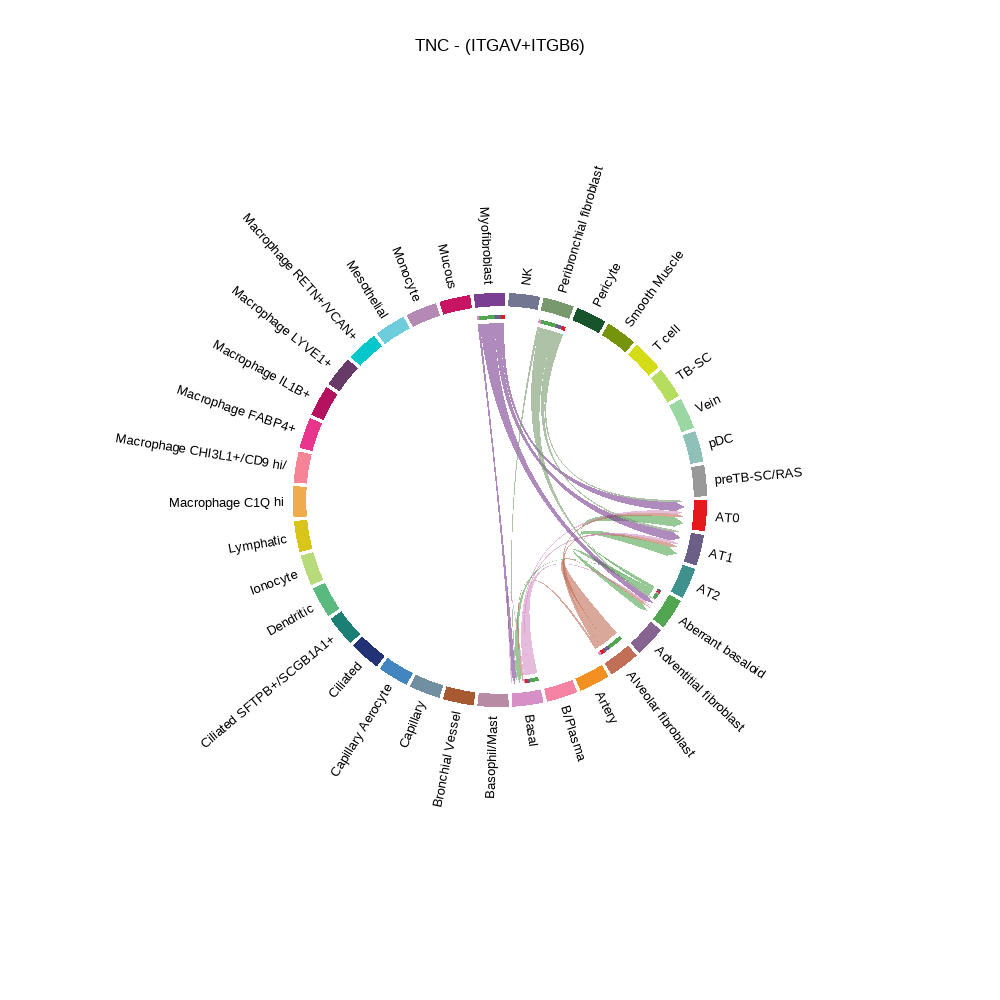

In [189]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "TENASCIN", pairLR.use = "TNC_ITGAV_ITGB6", layout = "chord")

[[1]]



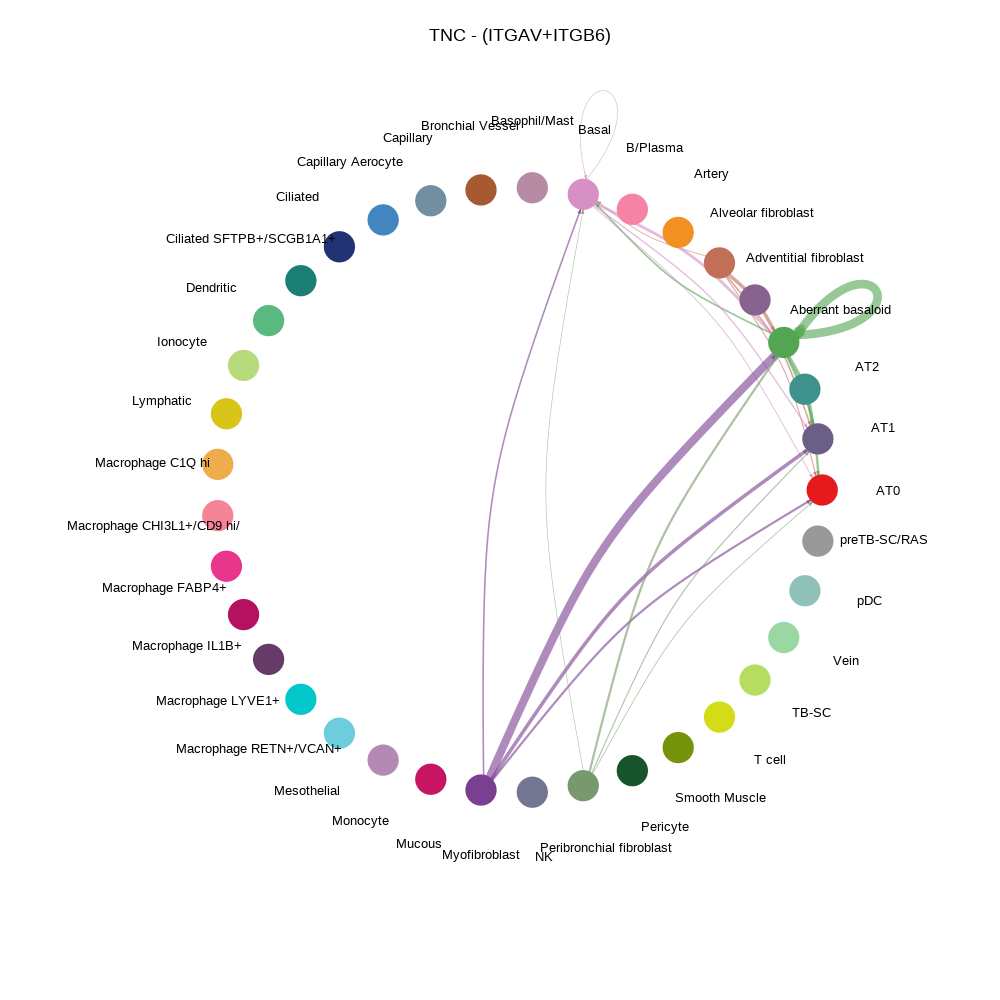

In [190]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "TENASCIN", pairLR.use = "TNC_ITGAV_ITGB6", layout = "circle")

# Macrophage_SPP1 Niche

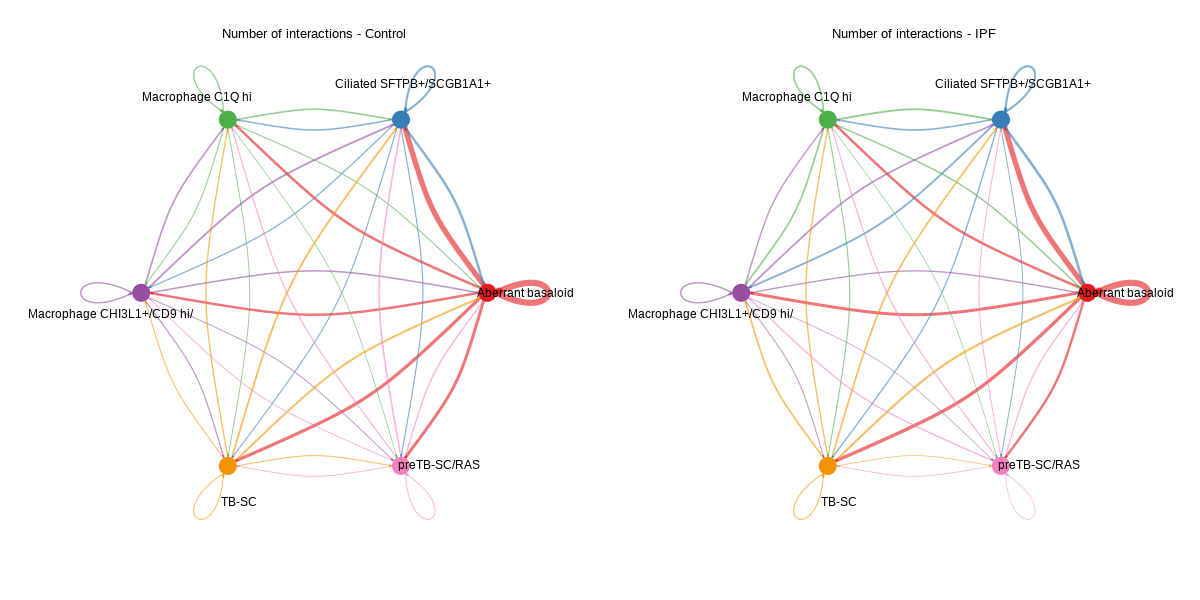

In [238]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= F, 
    title.name = "Number of interactions - Control",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= FALSE, 
    title.name = "Number of interactions - IPF",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)

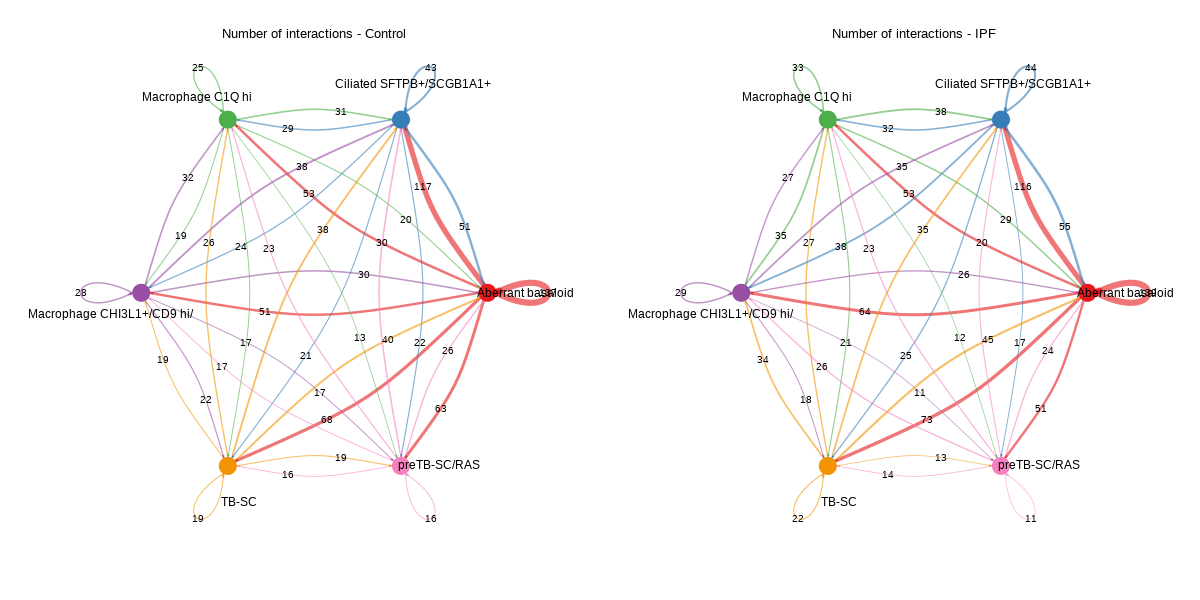

In [239]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - Control",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - IPF",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)

In [240]:
%%R -w 1200 -h 600
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_Circle_numbered.pdf")
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$count, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - Control",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$count, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= T, 
    title.name = "Number of interactions - IPF",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)
dev.off()

[1] 2


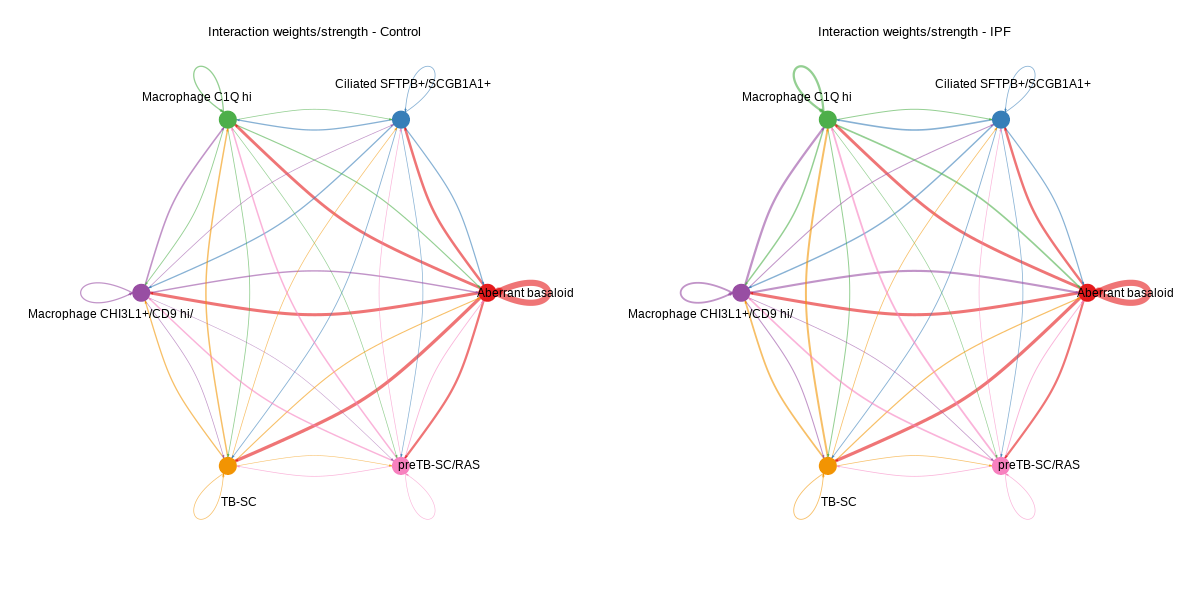

In [241]:
%%R -w 1200 -h 600
groupSize_Control <- as.numeric(table(Control@idents))

# set side-by-side plot displays 
par(mfrow = c(1,2), xpd=TRUE)

netVisual_circle(
    Control@net$weight, 
    #vertex.weight = groupSize_Control, 
    weight.scale = TRUE, 
    label.edge= F, 
    title.name = "Interaction weights/strength - Control",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)

groupSize_IPF <- as.numeric(table(IPF@idents))

netVisual_circle(
    IPF@net$weight, 
    #vertex.weight = groupSize_IPF, 
    weight.scale = TRUE, 
    label.edge= FALSE, 
    title.name = "Interaction weights/strength - IPF",
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    remove.isolate=T
)


In [55]:
%%R
spp1_net <- subsetCommunication(IPF,            sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"))

In [56]:
%%R
## 3700 interactions is a lot...
str(spp1_net)

'data.frame':	1315 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 19 20 4 19 20 4 4 4 19 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 4 4 4 20 20 20 4 20 15 15 ...
 $ ligand            : chr  "TGFB1" "TGFB1" "TGFB1" "TGFB1" ...
 $ receptor          : chr  "TGFbR1_R2" "TGFbR1_R2" "TGFbR1_R2" "TGFbR1_R2" ...
 $ prob              : num  0.00174 0.0064 0.00614 0.00069 0.00254 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1 1 1 1 1 1 2 2 4 4 ...
 $ interaction_name_2: chr  "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" "TGFB1 - (TGFBR1+TGFBR2)" ...
 $ pathway_name      : chr  "TGFb" "TGFb" "TGFb" "TGFb" ...
 $ annotation        : chr  "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" ...
 $ evidence          : chr  "KEGG: hsa04350" "KEGG: hsa04350" "KEGG: hsa04350" "KEGG: hsa04350"

In [57]:
%%R
sorted_spp1_net <- spp1_net %>%
  arrange(prob)

In [58]:
%%R
head(sorted_spp1_net)

                    source                     target  ligand  receptor
1 Ciliated SFTPB+/SCGB1A1+   Ciliated SFTPB+/SCGB1A1+   WNT7B FZD3_LRP5
2 Ciliated SFTPB+/SCGB1A1+   Ciliated SFTPB+/SCGB1A1+   WNT7B FZD6_LRP5
3        Aberrant basaloid Macrophage CHI3L1+/CD9 hi/ HLA-DMA       CD4
4 Ciliated SFTPB+/SCGB1A1+          Aberrant basaloid   WNT7B FZD6_LRP6
5        Aberrant basaloid   Ciliated SFTPB+/SCGB1A1+   WNT7B FZD3_LRP5
6 Ciliated SFTPB+/SCGB1A1+   Ciliated SFTPB+/SCGB1A1+   LAMB2      CD44
          prob pval interaction_name  interaction_name_2 pathway_name
1 0.0002321098 0.00  WNT7B_FZD3_LRP5 WNT7B - (FZD3+LRP5)          WNT
2 0.0002491519 0.00  WNT7B_FZD6_LRP5 WNT7B - (FZD6+LRP5)          WNT
3 0.0003281812 0.01      HLA-DMA_CD4       HLA-DMA - CD4       MHC-II
4 0.0003396536 0.00  WNT7B_FZD6_LRP6 WNT7B - (FZD6+LRP6)          WNT
5 0.0003559305 0.00  WNT7B_FZD3_LRP5 WNT7B - (FZD3+LRP5)          WNT
6 0.0003732676 0.00       LAMB2_CD44        LAMB2 - CD44      LAMININ
      

In [59]:
%%R
## filter for only signifcant interactions
sorted_spp1_net <- filter(sorted_spp1_net, pval<0.01)

In [60]:
%%R
str(sorted_spp1_net)

'data.frame':	1290 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 15 15 15 4 15 4 15 15 15 37 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 15 15 4 15 15 15 15 34 4 15 ...
 $ ligand            : chr  "WNT7B" "WNT7B" "WNT7B" "WNT7B" ...
 $ receptor          : chr  "FZD3_LRP5" "FZD6_LRP5" "FZD6_LRP6" "FZD3_LRP5" ...
 $ prob              : num  0.000232 0.000249 0.00034 0.000356 0.000373 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 247 250 410 247 1381 250 491 1601 1603 1500 ...
 $ interaction_name_2: chr  "WNT7B - (FZD3+LRP5)" "WNT7B - (FZD6+LRP5)" "WNT7B - (FZD6+LRP6)" "WNT7B - (FZD3+LRP5)" ...
 $ pathway_name      : chr  "WNT" "WNT" "WNT" "WNT" ...
 $ annotation        : chr  "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" ...
 $ evidence          : chr  "KEGG: hsa04310; PMID: 23209147" "KEGG: hsa04310; PMI

In [ ]:
%%R
write.csv(sorted_spp1_net, "IPF_MacsSPP1Niche_CellChat.csv")

In [249]:
%%R
unique(sorted_spp1_net$pathway_name)

 [1] "WNT"        "LAMININ"    "EGF"        "EPHA"       "AGRN"      
 [6] "COLLAGEN"   "MPZ"        "EPHB"       "TWEAK"      "NOTCH"     
[11] "HSPG"       "TGFb"       "MHC-II"     "VISFATIN"   "OCLN"      
[16] "VEGF"       "CD46"       "SEMA3"      "CD99"       "DESMOSOME" 
[21] "ICAM"       "GAS"        "SN"         "NRG"        "SPP1"      
[26] "CCL"        "PTPRM"      "GALECTIN"   "JAM"        "COMPLEMENT"
[31] "THBS"       "CADM"       "GDF"        "CDH"        "PECAM1"    
[36] "FN1"        "TENASCIN"   "PARs"       "CDH1"       "MK"        
[41] "ANNEXIN"    "ITGB2"      "GRN"        "UGRP1"      "ADGRE5"    
[46] "CD45"       "APP"       


In [250]:
%%R
## count number of interactions per category... maybe a way to split plots?
(counts_annotation <- setNames(data.frame(table(sorted_spp1_net$annotation)), c("annotation", "LR_pairs")))

          annotation LR_pairs
1  Cell-Cell Contact      333
2       ECM-Receptor      549
3 Secreted Signaling      408


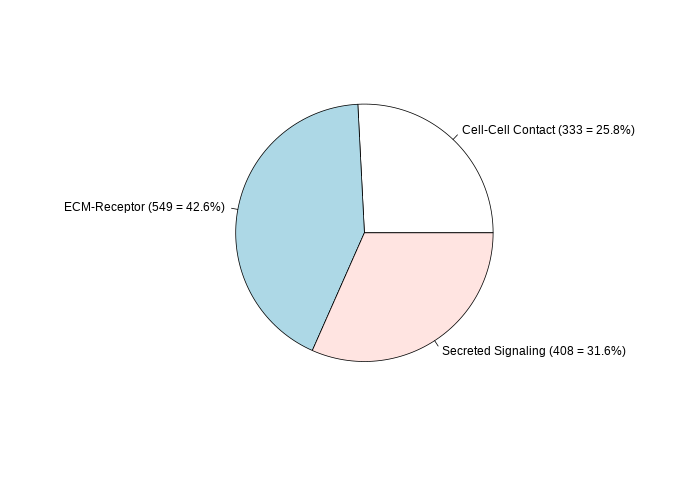

In [251]:
%%R -w 700
pie_labels <- paste0(counts_annotation$LR_pairs," = ", round(100 * counts_annotation$LR_pairs/sum(counts_annotation$LR_pairs), 1), "%")
pie(counts_annotation$LR_pairs, labels = paste0(counts_annotation$annotation," (", pie_labels,")"))

In [252]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_annotation_pie.pdf")
pie_labels <- paste0(counts_annotation$LR_pairs," = ", round(100 * counts_annotation$LR_pairs/sum(counts_annotation$LR_pairs), 1), "%")
pie(counts_annotation$LR_pairs, labels = paste0(counts_annotation$annotation," (", pie_labels,")"))
dev.off()

[1] 2


#### cell cell contact

In [253]:
%%R
## filter for only signifcant interactions
spp1_net_ccc <- filter(sorted_spp1_net, annotation == "Cell-Cell Contact")
str(spp1_net_ccc)

'data.frame':	333 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 15 15 15 15 4 15 34 34 34 15 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 34 4 37 15 4 37 34 4 37 15 ...
 $ ligand            : chr  "EFNA5" "EFNA5" "EFNA5" "MPZL1" ...
 $ receptor          : chr  "EPHA2" "EPHA4" "EPHA2" "MPZL1" ...
 $ prob              : num  0.000399 0.0004 0.000415 0.000428 0.000436 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1601 1603 1601 1697 1617 1734 1601 1603 1601 1601 ...
 $ interaction_name_2: chr  "EFNA5 - EPHA2" "EFNA5 - EPHA4" "EFNA5 - EPHA2" "MPZL1 - MPZL1" ...
 $ pathway_name      : chr  "EPHA" "EPHA" "EPHA" "MPZ" ...
 $ annotation        : chr  "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" "Cell-Cell Contact" ...
 $ evidence          : chr  "PMID: 15114347" "PMID: 15114347" "PMID: 15114347" "KEGG: hsa04514" ...


In [254]:
%%R
write.csv(spp1_net_ccc, "/IPF_MacsSPP1_Niche_CCC.csv")

In [255]:
%%R
(counts_pathway_ccc <- setNames(data.frame(table(spp1_net_ccc$pathway_name)), c("annotation", "LR_pairs")))

   annotation LR_pairs
1      ADGRE5        9
2         APP       29
3        CADM        4
4        CD45        4
5        CD46        6
6        CD99       30
7         CDH       17
8        CDH1        8
9   DESMOSOME        3
10       EPHA       38
11       EPHB        3
12       ICAM       20
13      ITGB2        8
14        JAM       16
15     MHC-II      103
16        MPZ        9
17      NOTCH        5
18       OCLN       16
19     PECAM1        3
20      PTPRM        1
21         SN        1


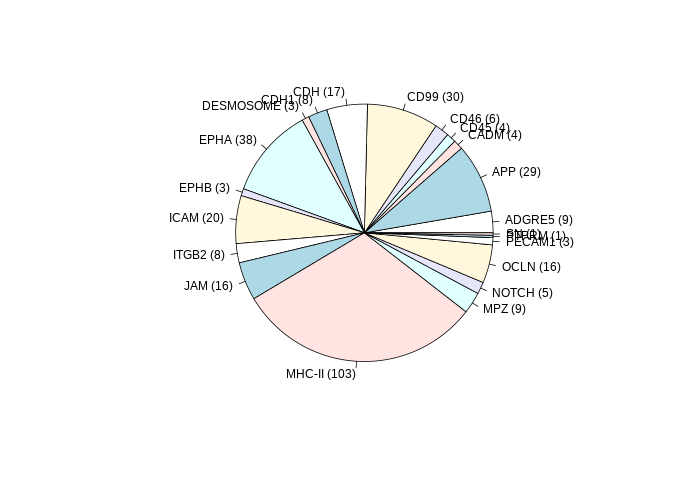

In [257]:
%%R -w 700
#pdf(file = "./figures/CellChat_IPF_ImmuneNiche_CCC_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ccc$LR_pairs," = ", round(100 * counts_pathway_ccc$LR_pairs/sum(counts_pathway_ccc$LR_pairs), 2), "%",")")
pie(counts_pathway_ccc$LR_pairs, labels = paste0(counts_pathway_ccc$annotation," (",counts_pathway_ccc$LR_pairs,")"))
#dev.off()

In [258]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_CCC_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ccc$LR_pairs," = ", round(100 * counts_pathway_ccc$LR_pairs/sum(counts_pathway_ccc$LR_pairs), 2), "%",")")
pie(counts_pathway_ccc$LR_pairs, labels = paste0(counts_pathway_ccc$annotation," (",counts_pathway_ccc$LR_pairs,")"))
dev.off()

[1] 2


In [259]:
%%R
spp1_net_ccc_pairs <- data.frame(interaction_name = spp1_net_ccc$interaction_name,interaction_name_2 = spp1_net_ccc$interaction_name_2)
spp1_net_ccc_pairs

     interaction_name    interaction_name_2
1         EFNA5_EPHA2         EFNA5 - EPHA2
2         EFNA5_EPHA4         EFNA5 - EPHA4
3         EFNA5_EPHA2         EFNA5 - EPHA2
4         MPZL1_MPZL1         MPZL1 - MPZL1
5         EFNB2_EPHB4         EFNB2 - EPHB4
6         JAG1_NOTCH3         JAG1 - NOTCH3
7         EFNA5_EPHA2         EFNA5 - EPHA2
8         EFNA5_EPHA4         EFNA5 - EPHA4
9         EFNA5_EPHA2         EFNA5 - EPHA2
10        EFNA5_EPHA2         EFNA5 - EPHA2
11        MPZL1_MPZL1         MPZL1 - MPZL1
12        MPZL1_MPZL1         MPZL1 - MPZL1
13        EFNB2_EPHA4         EFNB2 - EPHA4
14        EFNA5_EPHA2         EFNA5 - EPHA2
15        HLA-DOA_CD4         HLA-DOA - CD4
16          OCLN_OCLN           OCLN - OCLN
17        JAG1_NOTCH3         JAG1 - NOTCH3
18        JAG1_NOTCH2         JAG1 - NOTCH2
19        JAG1_NOTCH2         JAG1 - NOTCH2
20        EFNA5_EPHA2         EFNA5 - EPHA2
21        JAG1_NOTCH2         JAG1 - NOTCH2
22          CD46_JAG1           

R[write to console]: Comparing communications on a single object 




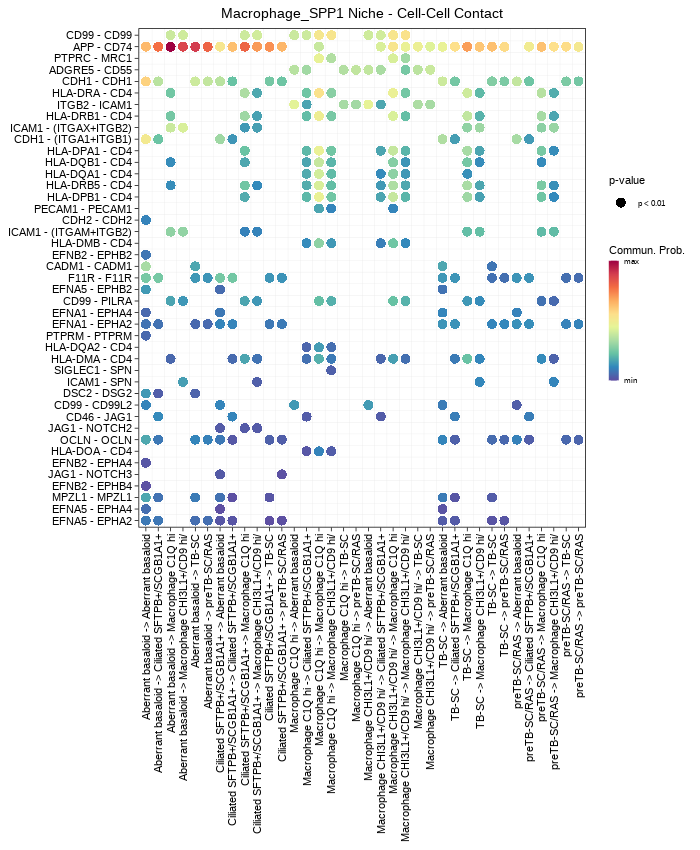

In [267]:
%%R -h 850 -w 700 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = spp1_net_ccc_pairs,
    remove.isolate = FALSE,
    thresh=0.01,
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    title.name = "Macrophage_SPP1 Niche - Cell-Cell Contact" )

In [265]:
%%R
options(stringsAsFactors = FALSE)

In [268]:
%%R -h 850 -w 700 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = spp1_net_ccc_pairs,
    remove.isolate = FALSE,
    thresh=0.01,
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    title.name = "Macrophage_SPP1 Niche - Cell-Cell Contact" )
ggsave(filename="./figures/CellChat_IPF_MacsSPP1_Niche_CCC_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 7 x 8.5 in image


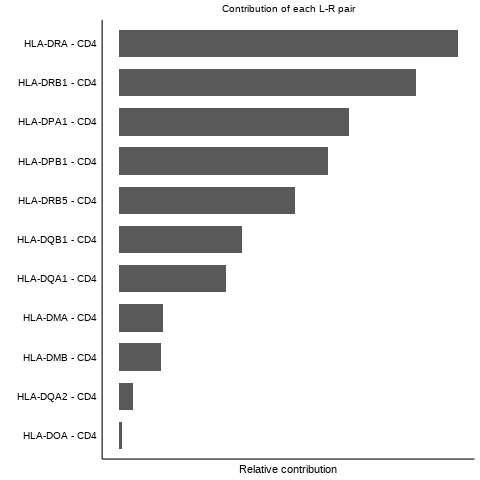

In [92]:
%%R
netAnalysis_contribution(IPF, signaling = "MHC-II")

[[1]]



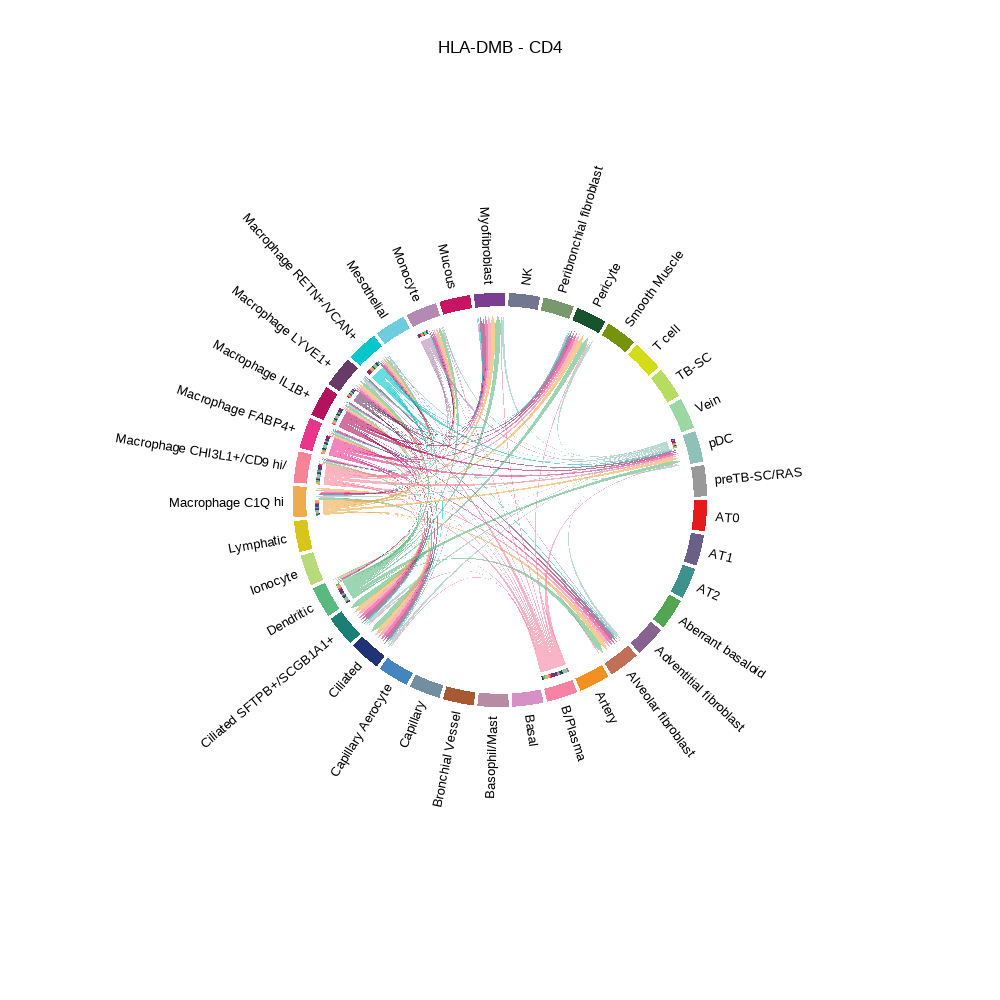

In [93]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "MHC-II", pairLR.use = "HLA-DMB_CD4", layout = "chord")

In [94]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_CCC_HLA-DMB_CD4_chord.pdf")
netVisual_individual(IPF, signaling = "MHC-II", pairLR.use = "HLA-DMB_CD4", layout = "chord")
dev.off()

[1] 2


#### Secreted Signaling

In [63]:
%%R
## filter for only signifcant interactions
spp1_net_ssg <- filter(sorted_spp1_net, annotation == "Secreted Signaling")
str(spp1_net_ssg)

'data.frame':	408 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 15 15 15 4 4 15 15 19 20 20 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 15 15 4 15 15 15 15 15 15 15 ...
 $ ligand            : chr  "WNT7B" "WNT7B" "WNT7B" "WNT7B" ...
 $ receptor          : chr  "FZD3_LRP5" "FZD6_LRP5" "FZD6_LRP6" "FZD3_LRP5" ...
 $ prob              : num  0.000232 0.000249 0.00034 0.000356 0.000382 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 247 250 410 247 250 491 493 782 499 501 ...
 $ interaction_name_2: chr  "WNT7B - (FZD3+LRP5)" "WNT7B - (FZD6+LRP5)" "WNT7B - (FZD6+LRP6)" "WNT7B - (FZD3+LRP5)" ...
 $ pathway_name      : chr  "WNT" "WNT" "WNT" "WNT" ...
 $ annotation        : chr  "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" "Secreted Signaling" ...
 $ evidence          : chr  "KEGG: hsa04310; PMID: 23209147" "KEGG: hsa04310; PMID: 2

In [104]:
%%R
write.csv(spp1_net_ssg, "/IPF_MacsSPP1_Niche_SSG.csv")

In [280]:
%%R
## a lot of different pathways... but some with only one LR_Pair! Filter here for pathways with at least ... 3? pairs?
(counts_pathway_ssg <- setNames(data.frame(table(spp1_net_ssg$pathway_name)), c("annotation", "LR_pairs")))

   annotation LR_pairs
1     ANNEXIN       12
2         CCL        6
3  COMPLEMENT       24
4         EGF       86
5    GALECTIN       23
6         GAS        8
7         GDF       24
8         GRN       12
9          MK       84
10        NRG       12
11       PARs        4
12      SEMA3       34
13       SPP1       26
14       TGFb       16
15      TWEAK        4
16      UGRP1        8
17       VEGF        4
18   VISFATIN       15
19        WNT        6


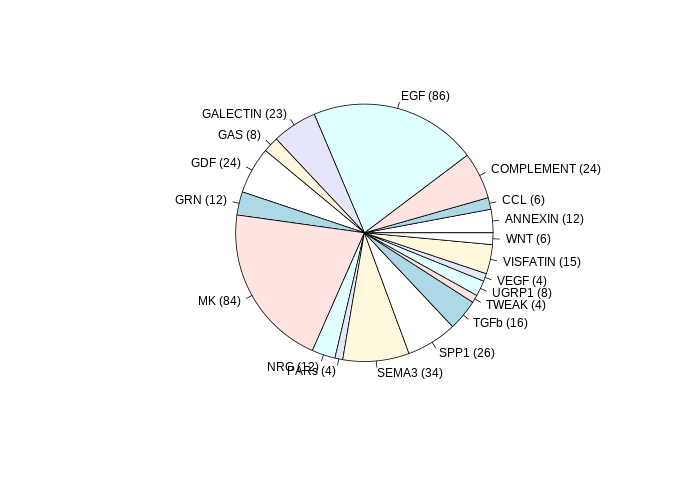

In [282]:
%%R -w 700
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs,")")
pie(counts_pathway_ssg$LR_pairs, labels = paste0(counts_pathway_ssg$annotation,pie_labels))

In [284]:
%%R
spp1_net_ssg_pairs <- data.frame(interaction_name = spp1_net_ssg$interaction_name,interaction_name_2 = spp1_net_ssg$interaction_name_2)
spp1_net_ssg_pairs

       interaction_name      interaction_name_2
1       WNT7B_FZD3_LRP5     WNT7B - (FZD3+LRP5)
2       WNT7B_FZD6_LRP5     WNT7B - (FZD6+LRP5)
3       WNT7B_FZD6_LRP6     WNT7B - (FZD6+LRP6)
4       WNT7B_FZD3_LRP5     WNT7B - (FZD3+LRP5)
5       WNT7B_FZD6_LRP5     WNT7B - (FZD6+LRP5)
6              BTC_EGFR              BTC - EGFR
7             BTC_ERBB4             BTC - ERBB4
8     TNFSF12_TNFRSF12A     TNFSF12 - TNFRSF12A
9             EREG_EGFR             EREG - EGFR
10           EREG_ERBB4            EREG - ERBB4
11      WNT7B_FZD6_LRP6     WNT7B - (FZD6+LRP6)
12            AREG_EGFR             AREG - EGFR
13           HBEGF_EGFR            HBEGF - EGFR
14  TGFB1_ACVR1B_TGFBR2 TGFB1 - (ACVR1B+TGFBR2)
15            BTC_ERBB4             BTC - ERBB4
16          HBEGF_ERBB4           HBEGF - ERBB4
17             BTC_EGFR              BTC - EGFR
18           NAMPT_INSR            NAMPT - INSR
19             BTC_EGFR              BTC - EGFR
20           HBEGF_EGFR            HBEGF

R[write to console]: Comparing communications on a single object 




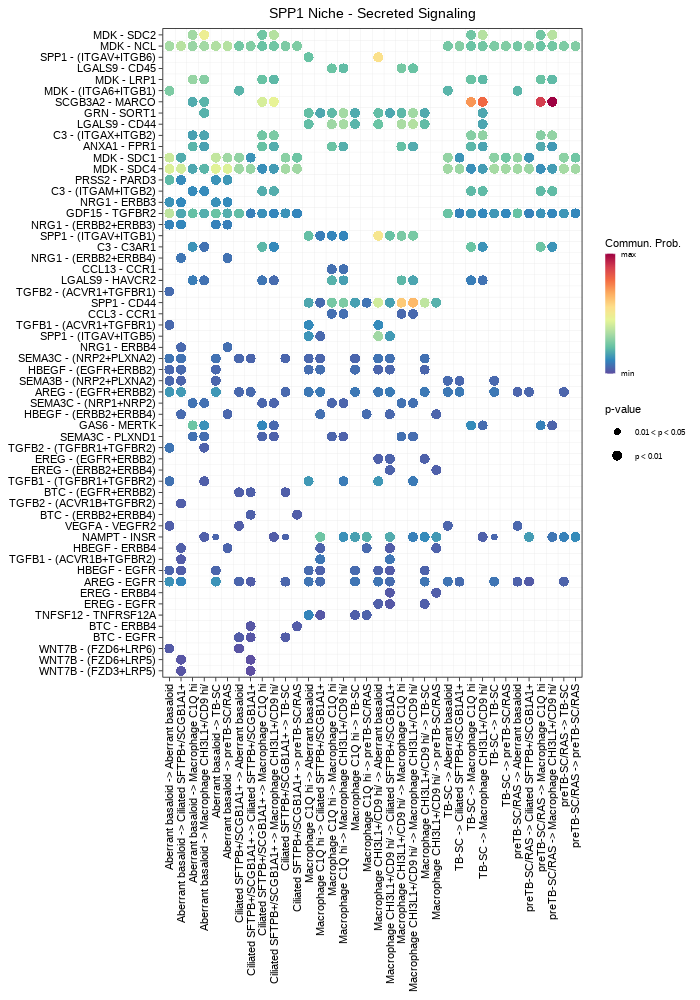

In [290]:
%%R -h 1000 -w 700 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = spp1_net_ssg_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    title.name = "SPP1 Niche - Secreted Signaling"
)

In [292]:
%%R -h 1000 -w 700 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = spp1_net_ssg_pairs,
    remove.isolate = FALSE,
    thresh=0.05,
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    title.name = "SPP1 Niche - Secreted Signaling"
)
ggsave(filename="./figures/CellChat_IPF_MacsSPP1_Niche_SSG_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 7 x 10 in image


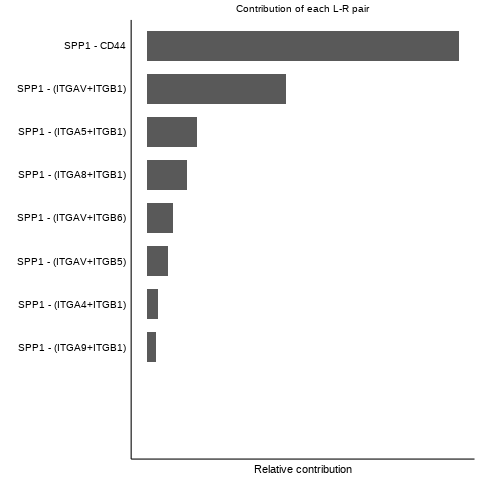

In [65]:
%%R
netAnalysis_contribution(IPF, signaling = "SPP1")

[[1]]



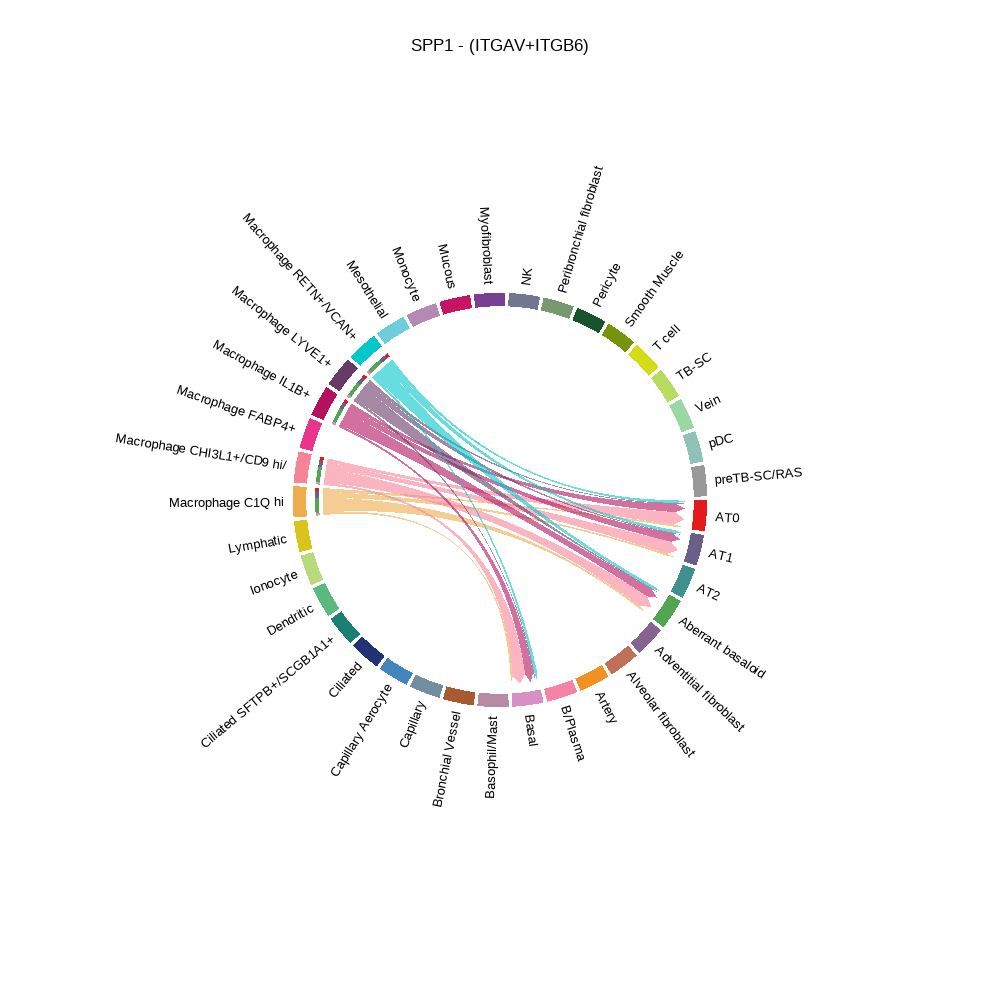

In [66]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "SPP1", pairLR.use = "SPP1_ITGAV_ITGB6", layout = "chord")

In [68]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_SPP1_ITGAV_ITGB6_chord.pdf")
netVisual_individual(IPF, signaling = "SPP1", pairLR.use = "SPP1_ITGAV_ITGB6", layout = "chord")
dev.off()

[1] 2


In [105]:
%%R
## filter for only signifcant interactions
spp1_net_ssg_test <- filter(spp1_net_ssg, interaction_name == "SCGB3A2_MARCO")
head(spp1_net_ssg_test)

                    source                     target  ligand receptor
1        Aberrant basaloid          Macrophage C1Q hi SCGB3A2    MARCO
2        Aberrant basaloid Macrophage CHI3L1+/CD9 hi/ SCGB3A2    MARCO
3 Ciliated SFTPB+/SCGB1A1+          Macrophage C1Q hi SCGB3A2    MARCO
4 Ciliated SFTPB+/SCGB1A1+ Macrophage CHI3L1+/CD9 hi/ SCGB3A2    MARCO
5                    TB-SC          Macrophage C1Q hi SCGB3A2    MARCO
6                    TB-SC Macrophage CHI3L1+/CD9 hi/ SCGB3A2    MARCO
        prob pval interaction_name interaction_name_2 pathway_name
1 0.01014334    0    SCGB3A2_MARCO    SCGB3A2 - MARCO        UGRP1
2 0.01221856    0    SCGB3A2_MARCO    SCGB3A2 - MARCO        UGRP1
3 0.05514468    0    SCGB3A2_MARCO    SCGB3A2 - MARCO        UGRP1
4 0.06581452    0    SCGB3A2_MARCO    SCGB3A2 - MARCO        UGRP1
5 0.13782112    0    SCGB3A2_MARCO    SCGB3A2 - MARCO        UGRP1
6 0.16174937    0    SCGB3A2_MARCO    SCGB3A2 - MARCO        UGRP1
          annotation       evidenc

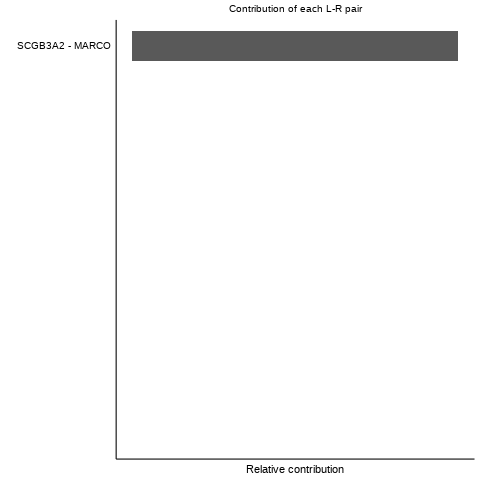

In [106]:
%%R
netAnalysis_contribution(IPF, signaling = "UGRP1")

In [107]:
%%R
pairLR.UGRP1 <- extractEnrichedLR(IPF, signaling = "UGRP1", geneLR.return = FALSE)
pairLR.UGRP1
#LR.show <- pairLR.TNC[1,]

  interaction_name
1    SCGB3A2_MARCO


[[1]]



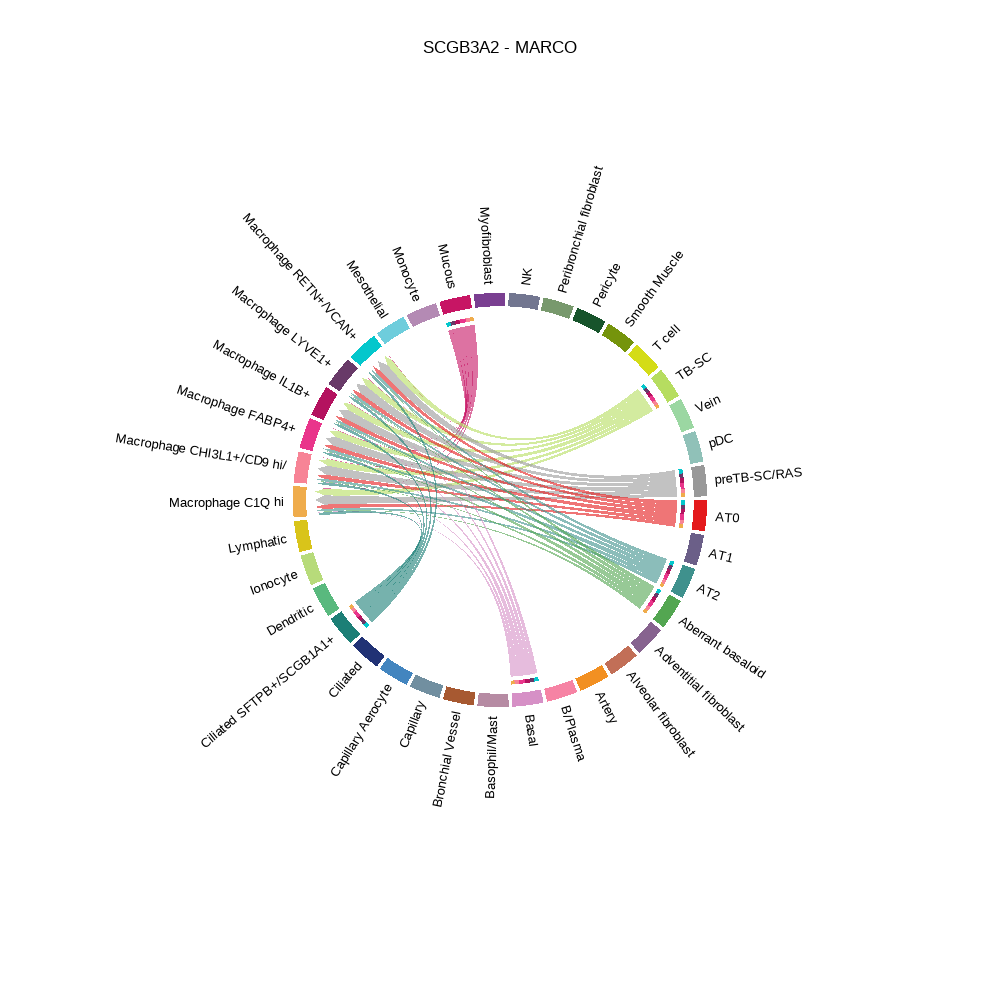

In [108]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "UGRP1", pairLR.use = "SCGB3A2_MARCO", layout = "chord")

In [109]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_SSG_SCGB3A2_MARCO_chord.pdf")
netVisual_individual(IPF, signaling = "UGRP1", pairLR.use = "SCGB3A2_MARCO", layout = "chord")
dev.off()

[1] 2


In [71]:
%%R
## filter for only signifcant interactions
spp1_net_ssg_test <- filter(spp1_net_ssg, ligand == "WNT7B")
head(spp1_net_ssg_test)

                    source                   target ligand  receptor
1 Ciliated SFTPB+/SCGB1A1+ Ciliated SFTPB+/SCGB1A1+  WNT7B FZD3_LRP5
2 Ciliated SFTPB+/SCGB1A1+ Ciliated SFTPB+/SCGB1A1+  WNT7B FZD6_LRP5
3 Ciliated SFTPB+/SCGB1A1+        Aberrant basaloid  WNT7B FZD6_LRP6
4        Aberrant basaloid Ciliated SFTPB+/SCGB1A1+  WNT7B FZD3_LRP5
5        Aberrant basaloid Ciliated SFTPB+/SCGB1A1+  WNT7B FZD6_LRP5
6        Aberrant basaloid        Aberrant basaloid  WNT7B FZD6_LRP6
          prob pval interaction_name  interaction_name_2 pathway_name
1 0.0002321098    0  WNT7B_FZD3_LRP5 WNT7B - (FZD3+LRP5)          WNT
2 0.0002491519    0  WNT7B_FZD6_LRP5 WNT7B - (FZD6+LRP5)          WNT
3 0.0003396536    0  WNT7B_FZD6_LRP6 WNT7B - (FZD6+LRP6)          WNT
4 0.0003559305    0  WNT7B_FZD3_LRP5 WNT7B - (FZD3+LRP5)          WNT
5 0.0003820595    0  WNT7B_FZD6_LRP5 WNT7B - (FZD6+LRP5)          WNT
6 0.0005208147    0  WNT7B_FZD6_LRP6 WNT7B - (FZD6+LRP6)          WNT
          annotation       

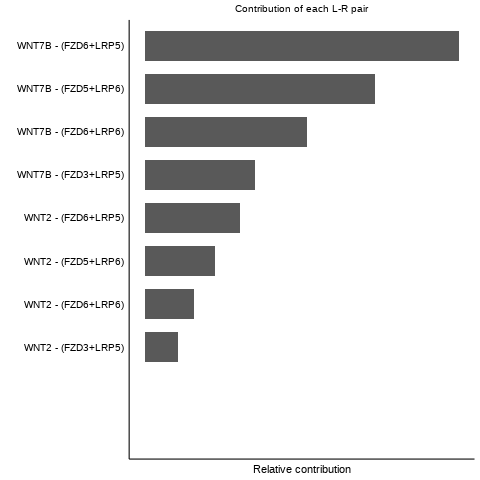

In [72]:
%%R
netAnalysis_contribution(IPF, signaling = "WNT")

In [73]:
%%R
pairLR.UGRP1 <- extractEnrichedLR(IPF, signaling = "WNT", geneLR.return = FALSE)
pairLR.UGRP1
#LR.show <- pairLR.TNC[1,]

  interaction_name
1   WNT2_FZD3_LRP5
2   WNT2_FZD6_LRP5
3  WNT7B_FZD3_LRP5
4  WNT7B_FZD6_LRP5
5   WNT2_FZD5_LRP6
6   WNT2_FZD6_LRP6
7  WNT7B_FZD5_LRP6
8  WNT7B_FZD6_LRP6


[[1]]



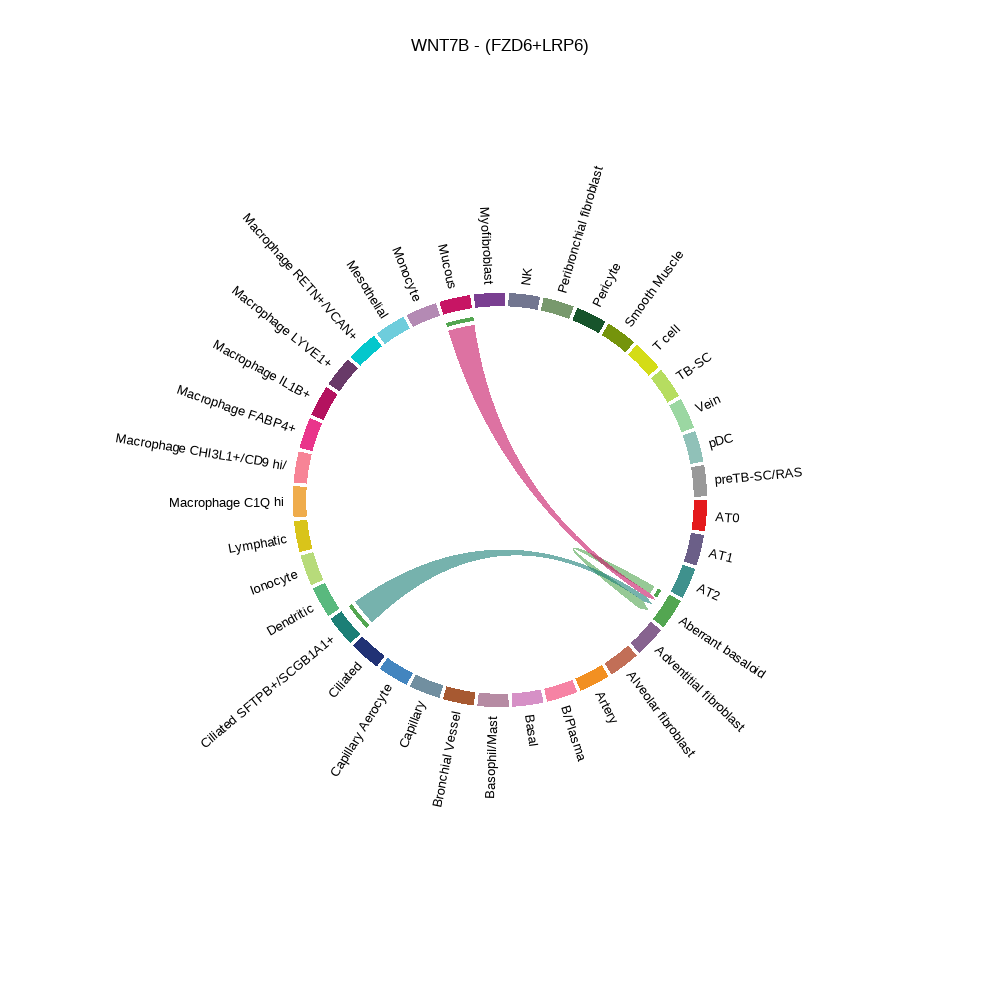

In [77]:
%%R -h 1000 -w 1000 -r 100
netVisual_individual(IPF, signaling = "WNT", pairLR.use = "WNT7B_FZD6_LRP6", layout = "chord")

In [79]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_SSG_WNT7B_FZD6_LRP6_chord.pdf")
netVisual_individual(IPF, signaling = "WNT", pairLR.use = "WNT7B_FZD6_LRP6", layout = "chord")
dev.off()

[1] 2


In [109]:
%%R -h 1000 -w 1000 -r 100
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_SSG_SCGB3A2_MARCO_chord.pdf")
netVisual_individual(IPF, signaling = "UGRP1", pairLR.use = "SCGB3A2_MARCO", layout = "chord")
dev.off()

[1] 2


#### ECM receptor

In [298]:
%%R
## filter for only signifcant interactions
spp1_net_ecm <- filter(sorted_spp1_net, annotation == "ECM-Receptor")
str(spp1_net_ecm)

'data.frame':	549 obs. of  11 variables:
 $ source            : Factor w/ 37 levels "AT0","AT1","AT2",..: 15 37 15 4 15 15 4 15 37 15 ...
 $ target            : Factor w/ 37 levels "AT0","AT1","AT2",..: 15 15 15 15 15 15 15 20 15 15 ...
 $ ligand            : chr  "LAMB2" "AGRN" "LAMB2" "COL4A1" ...
 $ receptor          : chr  "CD44" "DAG1" "DAG1" "CD44" ...
 $ prob              : num  0.000373 0.000407 0.00041 0.000416 0.000429 ...
 $ pval              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ interaction_name  : Factor w/ 1801 levels "TGFB1_TGFBR1_TGFBR2",..: 1381 1500 1508 1361 1379 1382 1377 1468 1381 1324 ...
 $ interaction_name_2: chr  "LAMB2 - CD44" "AGRN - DAG1" "LAMB2 - DAG1" "COL4A1 - CD44" ...
 $ pathway_name      : chr  "LAMININ" "AGRN" "LAMININ" "COLLAGEN" ...
 $ annotation        : chr  "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" "ECM-Receptor" ...
 $ evidence          : chr  "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" "KEGG: hsa04512" ...


In [299]:
%%R
write.csv(spp1_net_ecm, "/IPF_MacsSPP1_Niche_ECM.csv")

In [300]:
%%R
## a lot of different pathways... but some with only one LR_Pair! Filter here for pathways with at least ... 3? pairs?
(counts_pathway_ecm <- setNames(data.frame(table(spp1_net_ecm$pathway_name)), c("annotation", "LR_pairs")))

  annotation LR_pairs
1       AGRN        8
2   COLLAGEN      161
3        FN1       72
4       HSPG        4
5    LAMININ      252
6   TENASCIN       11
7       THBS       41


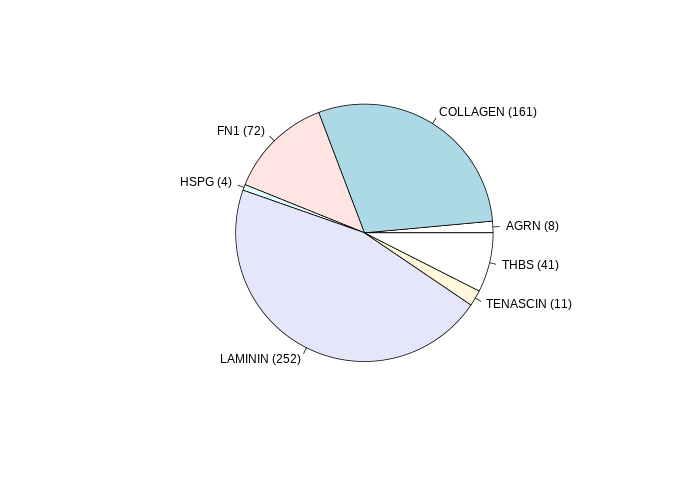

In [302]:
%%R -w 700
#pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs," = ", round(100 * counts_pathway_ecm$LR_pairs/sum(counts_pathway_ecm$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs,")")
pie(counts_pathway_ecm$LR_pairs, labels = paste0(counts_pathway_ecm$annotation,pie_labels))

In [303]:
%%R -w 700
pdf(file = "./figures/CellChat_IPF_MacsSPP1_Niche_ECM_pathways_pie.pdf")
#pie_labels <- paste0(" (",counts_pathway_ssg$LR_pairs," = ", round(100 * counts_pathway_ssg$LR_pairs/sum(counts_pathway_ssg$LR_pairs), 2), "%",")")
pie_labels <- paste0(" (",counts_pathway_ecm$LR_pairs,")")
pie(counts_pathway_ecm$LR_pairs, labels = paste0(counts_pathway_ecm$annotation,pie_labels))
dev.off()

[1] 2


In [304]:
%%R
spp1_net_ecm_pairs <- data.frame(interaction_name = spp1_net_ecm$interaction_name,interaction_name_2 = spp1_net_ecm$interaction_name_2)
spp1_net_ecm_pairs

      interaction_name     interaction_name_2
1           LAMB2_CD44           LAMB2 - CD44
2            AGRN_DAG1            AGRN - DAG1
3           LAMB2_DAG1           LAMB2 - DAG1
4          COL4A1_CD44          COL4A1 - CD44
5           LAMA5_CD44           LAMA5 - CD44
6           LAMB3_CD44           LAMB3 - CD44
7           LAMA3_CD44           LAMA3 - CD44
8           LAMB2_SV2C           LAMB2 - SV2C
9           LAMB2_CD44           LAMB2 - CD44
10   LAMB2_ITGAV_ITGB8  LAMB2 - (ITGAV+ITGB8)
11          HSPG2_DAG1           HSPG2 - DAG1
12          LAMA5_DAG1           LAMA5 - DAG1
13          LAMB3_DAG1           LAMB3 - DAG1
14          LAMA3_DAG1           LAMA3 - DAG1
15          LAMB2_DAG1           LAMB2 - DAG1
16  COL4A1_ITGAV_ITGB8 COL4A1 - (ITGAV+ITGB8)
17          LAMA5_SV2C           LAMA5 - SV2C
18          LAMB3_SV2C           LAMB3 - SV2C
19   LAMA5_ITGAV_ITGB8  LAMA5 - (ITGAV+ITGB8)
20   LAMB3_ITGAV_ITGB8  LAMB3 - (ITGAV+ITGB8)
21          LAMA3_SV2C           L

R[write to console]: Comparing communications on a single object 




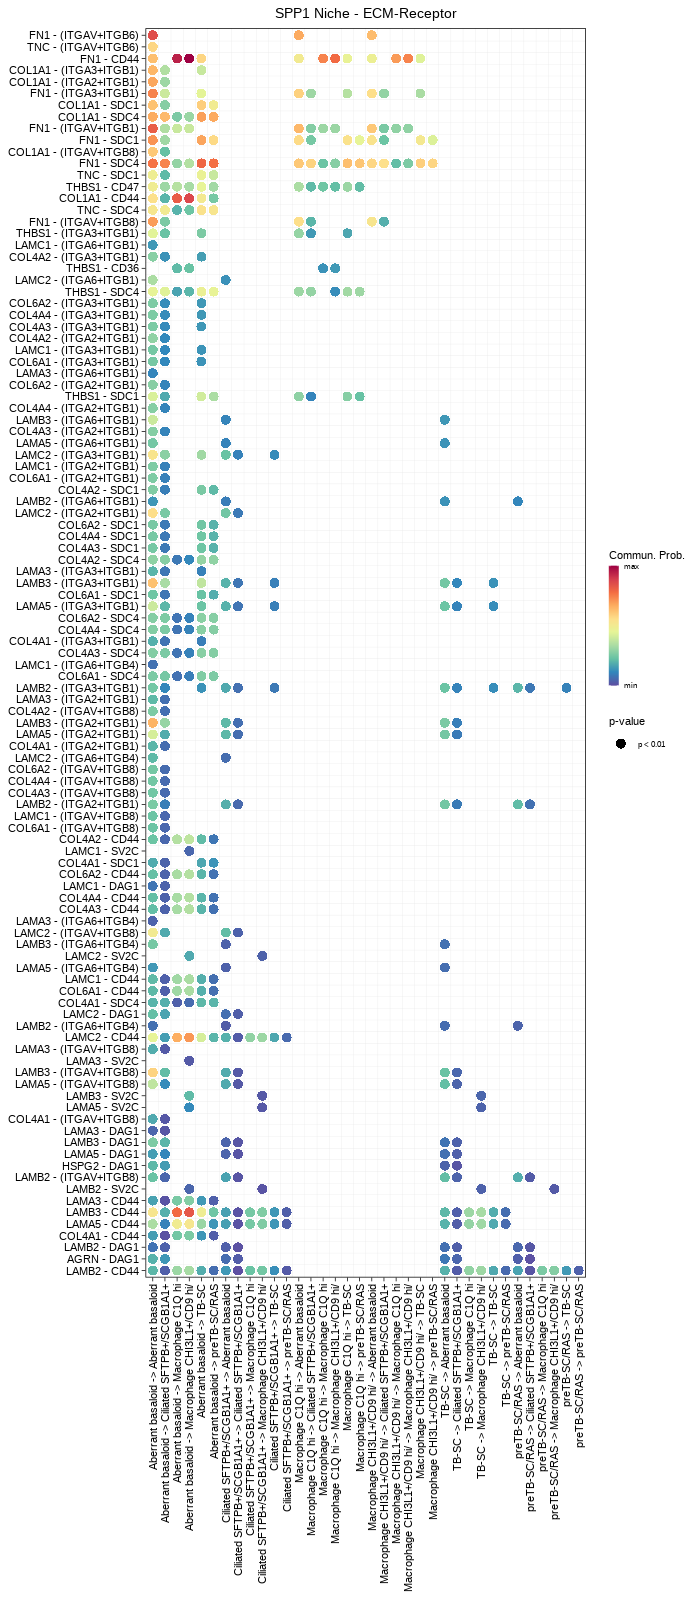

In [311]:
%%R -h 1600 -w 700 -r 100
netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = spp1_net_ecm_pairs,
    remove.isolate = FALSE,
    thresh=0.01,
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    title.name = "SPP1 Niche - ECM-Receptor"
)

In [313]:
%%R -h 1600 -w 700 -r 100
bubble <- netVisual_bubble(
    IPF, 
    #sources.use = c(1:4), 
    #targets.use = c(16,17), 
    # signaling = c("MHC-I","MHC-II"),
    pairLR.use = spp1_net_ecm_pairs,
    remove.isolate = FALSE,
    thresh=0.01,
    sources.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    targets.use = c("Macrophage CHI3L1+/CD9 hi/","Macrophage C1Q hi","Ciliated SFTPB+/SCGB1A1+","TB-SC","preTB-SC/RAS","Aberrant basaloid"),
    title.name = "SPP1 Niche - ECM-Receptor")
ggsave(filename="./figures/CellChat_IPF_MacsSPP1_Niche_ECM_pairs_heatmap.pdf", plot=bubble, dpi = 300)

R[write to console]: Comparing communications on a single object 




Saving 7 x 16 in image
